In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Classification model based on Logistic Regression

## Steps Involved:


1.Reading and Inspecting Data <br>
2.Data Cleaning and Preparation <br>
3.Data Visualization <br>
4.Classifying Dependant variable <br>
5.Generating Dummy variables <br>
6.Checking for outliers <br>
7.Splitting data in training and testing sets <br>
8.Scaling the features - Standard scalar technique <br>
9.Checking correlation <br>
10.Model Building
  - Feature selection using RFE <br>
  - Feature elimination using p- values and VIF <br>
  
11.Getting the predicted values on the train set <br>
12.Model Evaluation <br>  
  - Plotting ROC curve<br>
  - Finding optimal cut off point wrt accuracy, sensitivity and specificity<br>
  - Finding optimal cut off point wrt precision and recall<br>
  
13.Making Predictions on Test Dataset<br>
14.Inferences and Conclusions  
    

# Step - 1: Reading and Inspecting data 

In [ ]:
# Reading the file

Income = pd.read_csv('/content/DT_Income_dataset.csv.csv')
Income.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
Income.shape

(32561, 15)

In [ ]:
Income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Categorical attributes
<span style='color:Blue'> - workclass <br> - education <br> - marital.status <br> - occupation <br> - relationship <br> - race <br> - sex <br> - native.country <br> - income </span>

#### Numerical attributes
<span style='color:Blue'> - age <br> - fnlwgt <br> - education.num <br> - capital.gain <br> - capital.loss <br> - hours.per.week  </span>

In [ ]:
Income.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Step - 2: Data Cleaning and Preparation

In [ ]:
# Column-wise null count

Income.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
# Details of unique values of categorical columns

print("Unique number of work classes:", len(Income['workclass'].unique()))
print('workclass', Income.workclass.unique()) 
print("Unique number of education:", len(Income['education'].unique()))
print('education', Income.education.unique())
print("Unique number of marital status:", len(Income['marital.status'].unique()))
print('marital.status', Income['marital.status'].unique())
print("Unique number of occupation:", len(Income['occupation'].unique()))
print('occupation', Income.occupation.unique())
print("Unique number of relationship:", len(Income['relationship'].unique()))
print('relationship', Income.relationship.unique())
print("Unique number of sex:", len(Income['sex'].unique()))
print('sex', Income.sex.unique())
print("Unique number of race:", len(Income['race'].unique()))
print('race', Income.race.unique())
print("Unique number of native country:", len(Income['native.country'].unique()))
print('native.country', Income['native.country'].unique())
print("Unique number of income:", len(Income['income'].unique()))
print('income', Income.income.unique())

Unique number of work classes: 9
workclass ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
Unique number of education: 16
education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
Unique number of marital status: 7
marital.status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
Unique number of occupation: 15
occupation ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
Unique number of relationship: 6
relationship ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
Unique number of sex: 2
sex ['Female' 'Male']
Unique n

In [ ]:
# Count of unique categories in workclass

Income['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
# Checking the percentage of unique categories in workclass

(Income['workclass'].value_counts()/Income['workclass'].count())*100

Private             69.703019
Self-emp-not-inc     7.803814
Local-gov            6.427935
?                    5.638647
State-gov            3.986364
Self-emp-inc         3.427413
Federal-gov          2.948312
Without-pay          0.042996
Never-worked         0.021498
Name: workclass, dtype: float64

In [ ]:
# Count of unique categories in education

Income['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [ ]:
# Renaming and grouping different categories of education

Income['education'].replace('Some-college', 'College', inplace = True)
Income['education'].replace('Assoc-voc', 'Associates', inplace = True)
Income['education'].replace('Assoc-acdm', 'Associates', inplace = True)
Income['education'].replace('11th', 'Dropout', inplace = True)
Income['education'].replace('10th', 'Dropout', inplace = True)
Income['education'].replace('7th-8th', 'Dropout', inplace = True)
Income['education'].replace('Prof-school', 'Masters', inplace = True)
Income['education'].replace('9th', 'Dropout', inplace = True)
Income['education'].replace('12th', 'Dropout', inplace = True)
Income['education'].replace('5th-6th', 'Dropout', inplace = True)
Income['education'].replace('1st-4th', 'Dropout', inplace = True)
Income['education'].replace('Preschool', 'Dropout', inplace = True)

In [ ]:
# Count of unique categories in marital status

Income['marital.status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [ ]:
# Renaming and grouping different categories of marital status

Income['marital.status'].replace('Married-civ-spouse', 'Married', inplace = True)
Income['marital.status'].replace('Divorced', 'Separated', inplace = True)
Income['marital.status'].replace('Married-AF-spouse', 'Married', inplace = True)
Income['marital.status'].replace('Married-spouse-absent', 'Not married', inplace = True)
Income['marital.status'].replace('Never-married', 'Not married', inplace = True)

In [ ]:
# Count of unique categories in occupation

Income['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
# Checking the percentage of unique categories in occupation

(Income['occupation'].value_counts()/Income['occupation'].count())*100

Prof-specialty       12.714597
Craft-repair         12.588680
Exec-managerial      12.487331
Adm-clerical         11.578268
Sales                11.209729
Other-service        10.119468
Machine-op-inspct     6.148460
?                     5.660146
Transport-moving      4.904641
Handlers-cleaners     4.207487
Farming-fishing       3.052732
Tech-support          2.850035
Protective-serv       1.993182
Priv-house-serv       0.457603
Armed-Forces          0.027640
Name: occupation, dtype: float64

In [ ]:
# Count of unique categories in relationship

Income['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [ ]:
# Count of unique categories in sex

Income['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [ ]:
# Count of unique categories in race

Income['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [ ]:
# Count of unique categories in native country

Income['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [ ]:
# Checking the percentage of unique categories in native country

(Income['native.country'].value_counts()/Income['native.country'].count())*100

United-States                 89.585701
Mexico                         1.974755
?                              1.790486
Philippines                    0.608089
Germany                        0.420749
Canada                         0.371610
Puerto-Rico                    0.350112
El-Salvador                    0.325543
India                          0.307116
Cuba                           0.291760
England                        0.276404
Jamaica                        0.248764
South                          0.245693
China                          0.230337
Italy                          0.224195
Dominican-Republic             0.214981
Vietnam                        0.205768
Guatemala                      0.196554
Japan                          0.190412
Poland                         0.184270
Columbia                       0.181198
Taiwan                         0.156629
Haiti                          0.135131
Iran                           0.132060
Portugal                       0.113633


In [ ]:
# Count of unique categories in income

Income['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [ ]:
# Checking the percentage of unique categories in income

(Income['income'].value_counts()/Income['income'].count())*100

<=50K    75.919044
>50K     24.080956
Name: income, dtype: float64

#### Inference on income
<span style='color:Blue'> - 76% people have income less than or equal to 50K <br> - 24% people have income more than 50K  </span> 

#### Inference on the presence of "?"
<span style='color:Blue'> - 5.64% in work space <br> - 5.66% in occupation  <br> - 1.79% in native country  </span> 
#### Since the percentage of values having "?" is less, the rows with values "?" is removed for further analysis

In [ ]:
# Removing rows with "?" values

Income = Income[(Income.astype(str) != '?').all(axis=1)]
len(Income) 

30162

In [ ]:
# Checking for duplicate values

Income[Income.duplicated(subset = None, keep = 'first')]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8453,25,Private,308144,Bachelors,13,Not married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8645,90,Private,52386,College,10,Not married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
12202,21,Private,250051,College,10,Not married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
14346,20,Private,107658,College,10,Not married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
15603,25,Private,195994,Dropout,2,Not married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
17344,21,Private,243368,Dropout,1,Not married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
19067,46,Private,173243,HS-grad,9,Married,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
20507,19,Private,97261,HS-grad,9,Not married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
22783,19,Private,138153,College,10,Not married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
22934,19,Private,146679,College,10,Not married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K


In [ ]:
# Removing duplicate values

Income.drop_duplicates(subset = None, keep = 'first', inplace =True)

In [ ]:
# Checking the length of the dataset

len(Income)

30139

In [ ]:
Income.shape

(30139, 15)

# Step -3: Data Visualization

## 3.1 Visualizing Categorical variables

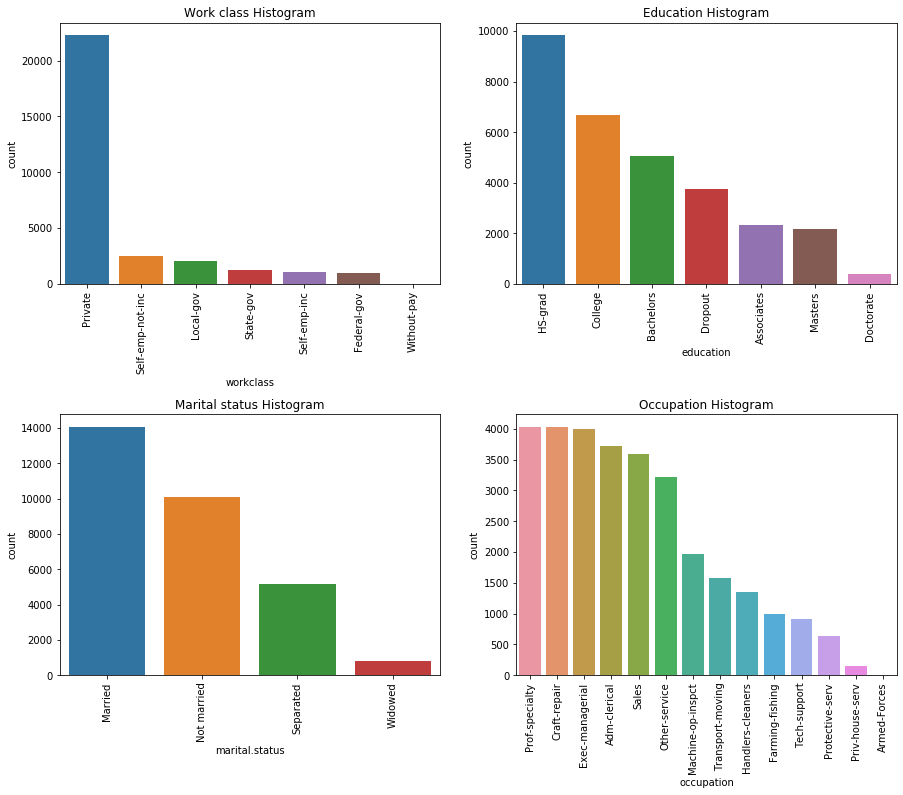

In [ ]:
# Plotting Histogram of Work class, education, marital status and occupation

plt.figure(figsize=(15,12))


plt.subplot(2,2,1)
plt.title('Work class Histogram')
sns.countplot(Income['workclass'], order = Income['workclass'].value_counts().sort_values(ascending=False).index)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('Education Histogram')
sns.countplot(Income['education'], order = Income['education'].value_counts().sort_values(ascending=False).index)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
plt.title('Marital status Histogram')
sns.countplot(Income['marital.status'], order = Income['marital.status'].value_counts().sort_values(ascending=False).index)
plt.xticks(rotation=90)

plt.subplot(2,2,4)
plt.title('Occupation Histogram')
sns.countplot(Income['occupation'], order = Income['occupation'].value_counts().sort_values(ascending=False).index)
plt.xticks(rotation=90)

plt.subplots_adjust(hspace= 0.5)


plt.show()

#### Inference: 
<span style='color:Blue'> - Private work class leads the others <br> - The count of HS-graduates is the highest followed by College, bachelors and so on  <br> - Majority of the people in the data set are married <br> - In regard with occupation, Prof-speciality, craft-repaur, exec-managerial tops the others </span> 

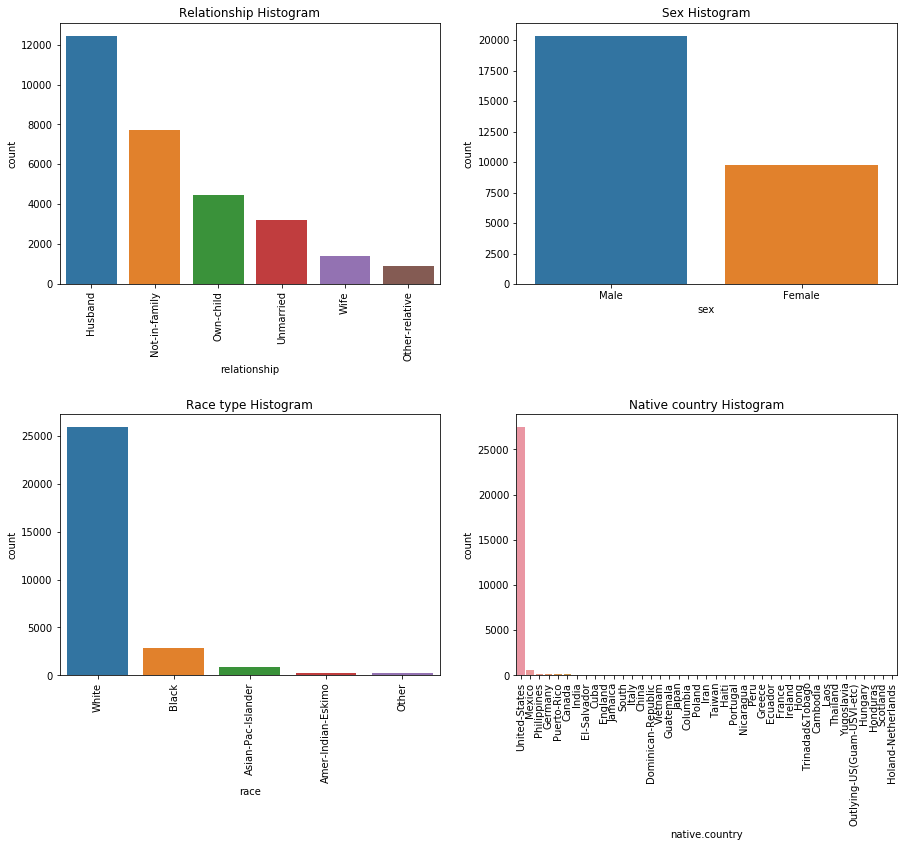

In [ ]:
# Plotting Histogram of relationship, sex, race and native country

plt.figure(figsize=(15,12))


plt.subplot(2,2,1)
plt.title('Relationship Histogram')
sns.countplot(Income['relationship'], order = Income['relationship'].value_counts().sort_values(ascending=False).index)
plt.xticks(rotation=90)

plt.subplot(2,2,2)
plt.title('Sex Histogram')
sns.countplot(Income['sex'], order = Income['sex'].value_counts().sort_values(ascending=False).index)

plt.subplot(2,2,3)
plt.title('Race type Histogram')
sns.countplot(Income['race'], order = Income['race'].value_counts().sort_values(ascending=False).index)
plt.xticks(rotation=90)

plt.subplot(2,2,4)
plt.title('Native country Histogram')
sns.countplot(Income['native.country'], order = Income['native.country'].value_counts().sort_values(ascending=False).index)
plt.xticks(rotation=90)

plt.subplots_adjust(hspace= 0.5)

plt.show()


#### Inference: 
<span style='color:Blue'> - Relationship category of Husband tops the others <br> - The male category leads the females <br> - With respect to race, White people are the highest  <br> - United States is the native country of the majority of the people and other country people are infact negligible </span> 

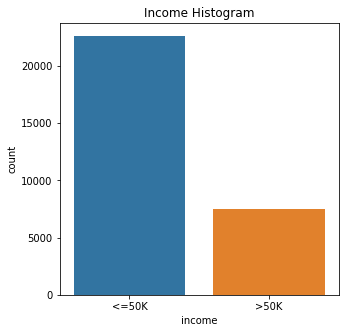

In [ ]:
# Plotting Histogram of income

plt.figure(figsize=(5,5))


plt.title('Income Histogram')
sns.countplot(Income['income'], order = Income['income'].value_counts().sort_values(ascending=False).index)


#### Inference: 
<span style='color:Blue'> - Majority of the people fall under the income category of <= 50K. Income level less than 50K is more than 3 times to that of income above 50K </span> 

## 3.2 Visualization of attributes with respect to Income

### 1. Age

In [ ]:
# To find the count of age with respect to income

Income.groupby(['age', 'income']).size()

age  income
17   <=50K     328
18   <=50K     447
19   <=50K     589
     >50K        1
20   <=50K     628
              ... 
85   <=50K       3
86   <=50K       1
88   <=50K       3
90   <=50K      27
     >50K        7
Length: 137, dtype: int64

In [ ]:
# Finding the mean of age with respect to income categories

Income[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,>50K,43.960165
0,<=50K,36.611585


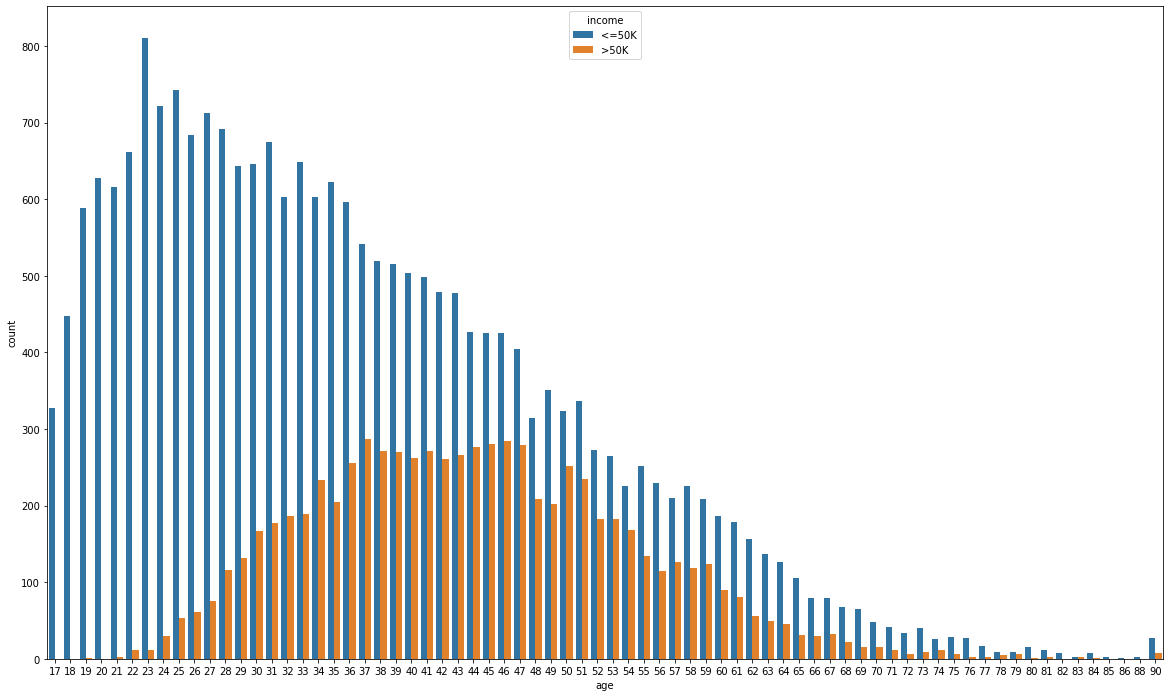

In [ ]:
# Count plot of age with respect to income

plt.figure(figsize=(20,12))
sns.countplot (x = Income['age'], hue = Income['income'])

#### Inference: 
<span style='color:Blue'> - The graph clearly states that age and income are dependant on each other  <br> - The count of people earning income more than 50K is very less when compared to people earning income less than 50K <br> - The number of people earning income less than 50K is high for ages varying from 17 to 65 <br> - People ranging between 30 to 60 years of age seem to earn more than 50K income </span> 

### 2. Work class

In [ ]:
# To find the count of work class with respect to income

Income.groupby(['workclass', 'income']).size()

workclass         income
Federal-gov       <=50K       578
                  >50K        365
Local-gov         <=50K      1458
                  >50K        609
Private           <=50K     17390
                  >50K       4874
Self-emp-inc      <=50K       474
                  >50K        600
Self-emp-not-inc  <=50K      1784
                  >50K        714
State-gov         <=50K       935
                  >50K        344
Without-pay       <=50K        14
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

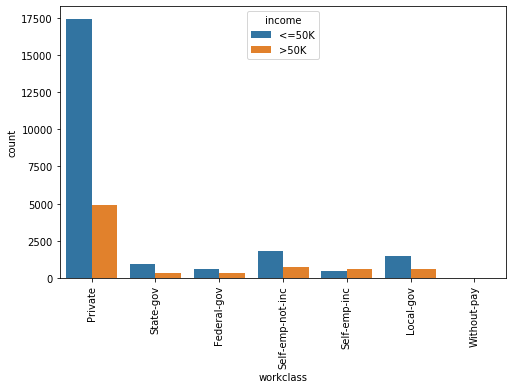

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot (x = Income['workclass'], hue = Income['income'])
plt.xticks(rotation=90)

#### Inference: 
<span style='color:Blue'> - The count of people earning income less than 50K peaks for almost all the categories of work classes  <br> - The highest number belong to private work class where the count of people earning income less than 50K is almost 3 times more than the number of people earning income more than 50K </span> 

### 3. Education

In [ ]:
# To find the count of education with respect to income

Income.groupby(['education', 'income']).size()

education   income
Associates  <=50K     1715
            >50K       600
Bachelors   <=50K     2916
            >50K      2126
College     <=50K     5334
            >50K      1335
Doctorate   <=50K       95
            >50K       280
Dropout     <=50K     3511
            >50K       225
HS-grad     <=50K     8218
            >50K      1616
Masters     <=50K      844
            >50K      1324
dtype: int64

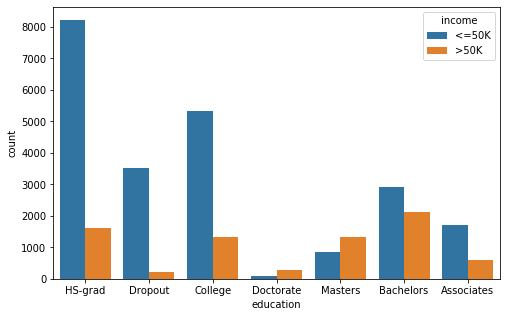

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot (x = Income['education'], hue = Income['income'])

#### Inference: 
<span style='color:Blue'> - The HS graduates tend to earn icome less than 50K the most   <br> - The people with Masters degree earn income more than 50K the most when compared to other education levels </span> 

### 4. Marital status

In [ ]:
# To find the count of marital status with respect to income

Income.groupby(['marital.status', 'income']).size()

marital.status  income
Married         <=50K     7673
                >50K      6407
Not married     <=50K     9580
                >50K       501
Separated       <=50K     4633
                >50K       518
Widowed         <=50K      747
                >50K        80
dtype: int64

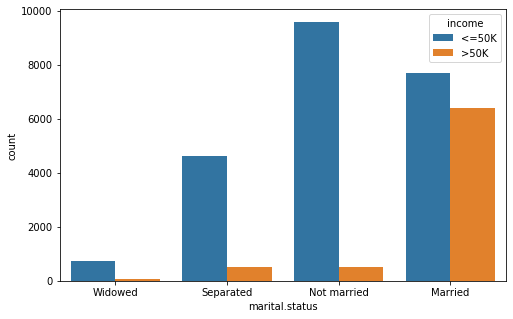

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot (x = Income['marital.status'], hue = Income['income'])

#### Inference: 
<span style='color:Blue'> - Not married people tend to earn income less than 50K the most  <br> - Almost the same count of married people earn income more than 50K and less than or equal to 50K  </span> 

### 5. Occupation

In [ ]:
# To find the count of occupation with respect to income

Income.groupby(['occupation', 'income']).size()

occupation         income
Adm-clerical       <=50K     3221
                   >50K       498
Armed-Forces       <=50K        8
                   >50K         1
Craft-repair       <=50K     3117
                   >50K       908
Exec-managerial    <=50K     2054
                   >50K      1937
Farming-fishing    <=50K      872
                   >50K       115
Handlers-cleaners  <=50K     1266
                   >50K        83
Machine-op-inspct  <=50K     1720
                   >50K       244
Other-service      <=50K     3077
                   >50K       132
Priv-house-serv    <=50K      140
                   >50K         1
Prof-specialty     <=50K     2224
                   >50K      1810
Protective-serv    <=50K      434
                   >50K       210
Sales              <=50K     2614
                   >50K       970
Tech-support       <=50K      633
                   >50K       278
Transport-moving   <=50K     1253
                   >50K       319
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

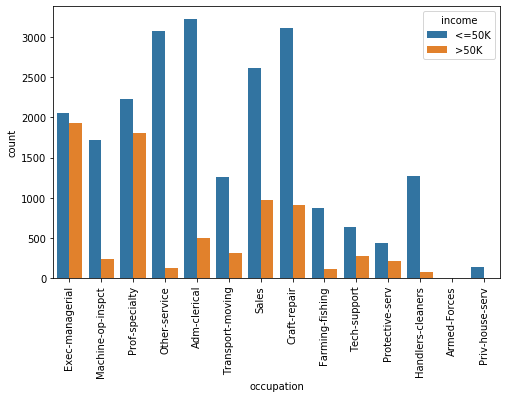

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot (x = Income['occupation'], hue = Income['income'])
plt.xticks(rotation=90)

#### Inference: 
<span style='color:Blue'> - Adm-clerical, craft repair and other services occupation people earns income less than 50K the most   <br> - Exec-managerial and prof-specialty occupation earns income more than 50 K for majority people  </span> 

### 6. Relationship

In [ ]:
# To find the count of relationship with respect to income

Income.groupby(['relationship', 'income']).size()

relationship    income
Husband         <=50K     6780
                >50K      5677
Not-in-family   <=50K     6891
                >50K       823
Other-relative  <=50K      854
                >50K        35
Own-child       <=50K     4398
                >50K        64
Unmarried       <=50K     2998
                >50K       213
Wife            <=50K      712
                >50K       694
dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

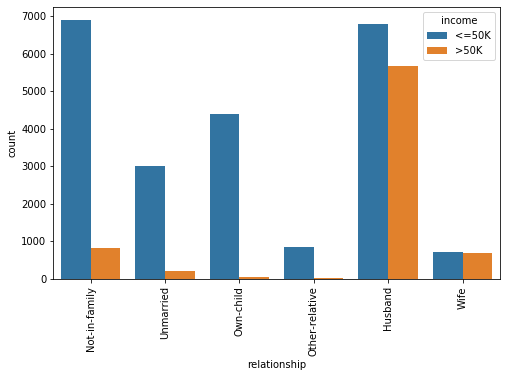

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot (x = Income['relationship'], hue = Income['income'])
plt.xticks(rotation=90)

#### Inference: 
<span style='color:Blue'> - The people with relationship stated as Husband and Not in family has scored the highest in earning income less than 50K <br> - Husband relationship has also leaded in income more than 50K as well  </span> 

### 7. Sex

In [ ]:
# To find the count of sex with respect to income

Income.groupby(['sex', 'income']).size()

sex     income
Female  <=50K      8661
        >50K       1112
Male    <=50K     13972
        >50K       6394
dtype: int64

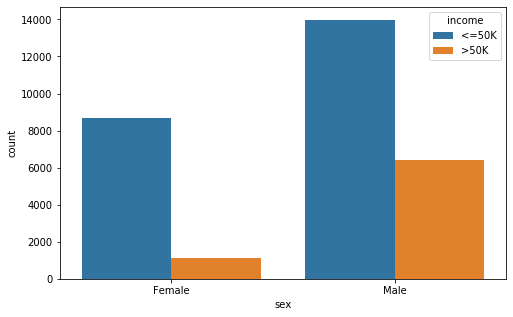

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot (x = Income['sex'], hue = Income['income'])

#### Inference: 
<span style='color:Blue'> - Male category leads in both the cases of income less than or equal to 50K and more than 50K </span> 

### 8. Race

In [ ]:
# To find the count of race with respect to income

Income.groupby(['race', 'income']).size()

race                income
Amer-Indian-Eskimo  <=50K       252
                    >50K         34
Asian-Pac-Islander  <=50K       646
                    >50K        248
Black               <=50K      2450
                    >50K        366
Other               <=50K       210
                    >50K         21
White               <=50K     19075
                    >50K       6837
dtype: int64

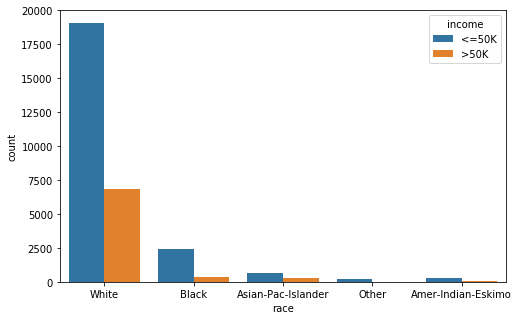

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot (x = Income['race'], hue = Income['income'])

#### Inference: 
<span style='color:Blue'> - White people are more common in the data set <br> - They tend to peak in both the categories of income </span> 

### 9. Native country

In [ ]:
# To find the count of native country with respect to income

Income.groupby(['native.country', 'income']).size()

native.country  income
Cambodia        <=50K       11
                >50K         7
Canada          <=50K       71
                >50K        36
China           <=50K       48
                          ... 
United-States   >50K      6993
Vietnam         <=50K       59
                >50K         5
Yugoslavia      <=50K       10
                >50K         6
Length: 80, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text xticklabel objects>)

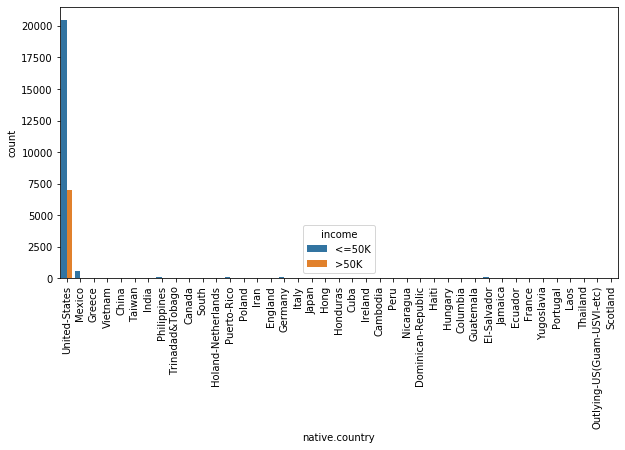

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot (x = Income['native.country'], hue = Income['income'])
plt.xticks(rotation=90)

#### Inference: 
<span style='color:Blue'> - Majority of the people belong to United states <br> - The count of people from other native places are negligible </span> 

### 10. Hours per week

In [ ]:
# To find the count of hours per week with respect to income

Income.groupby(['hours.per.week', 'income']).size()

hours.per.week  income
1               <=50K      6
                >50K       1
2               <=50K     13
                >50K       2
3               <=50K     23
                          ..
97              >50K       1
98              <=50K      8
                >50K       3
99              <=50K     53
                >50K      25
Length: 173, dtype: int64

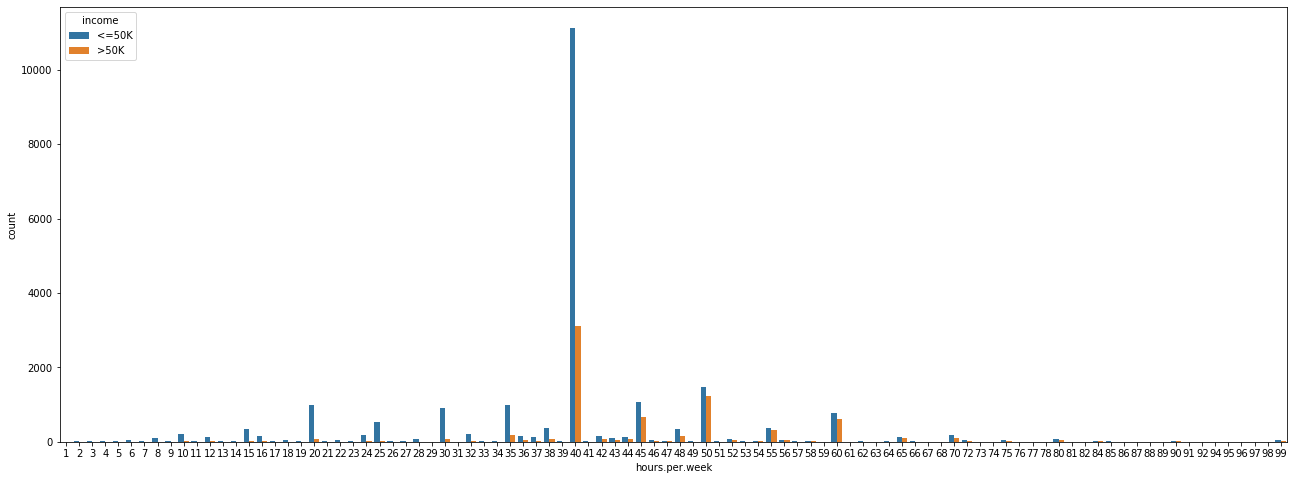

In [ ]:
plt.figure(figsize=(22,8))
sns.countplot (x = Income['hours.per.week'], hue = Income['income'])

#### Inference: 
<span style='color:Blue'> - 40 hours per week is the most common number of hours per week <br> - People with income less than or equal to 50K is much more than people with income more than 50K </span> 

### 11. Age + Hours per week

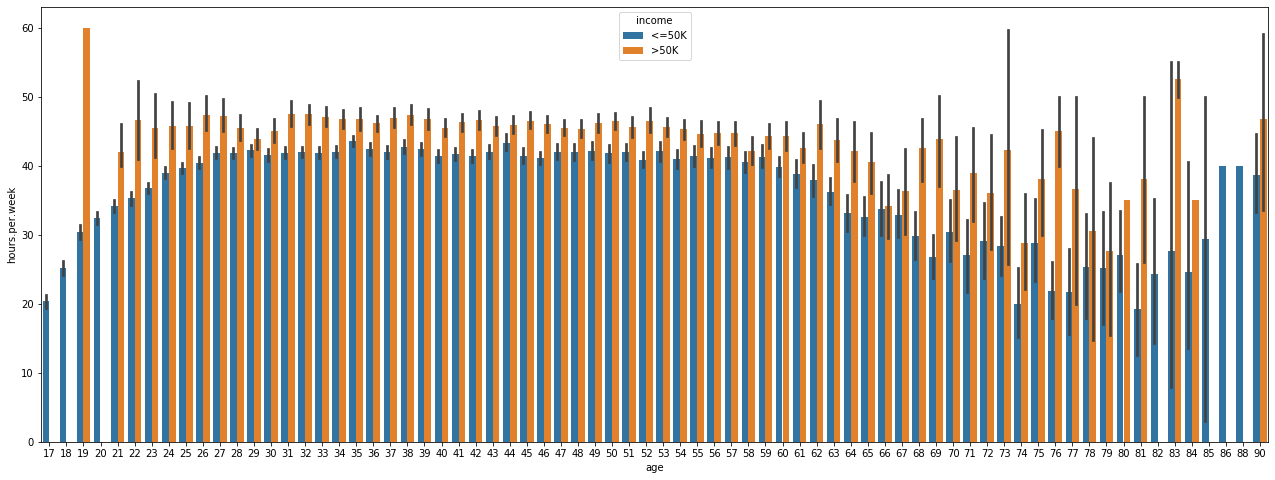

In [ ]:
plt.figure(figsize=(22,8))
sns.barplot(Income['age'], Income['hours.per.week'], hue=Income['income'])

### 12. Occupation + Hours per week

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

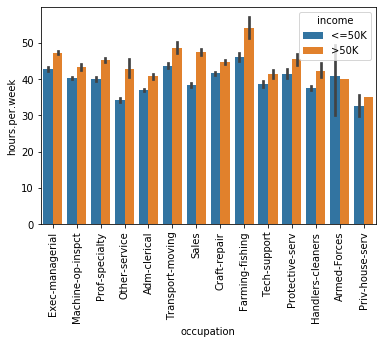

In [ ]:
sns.barplot(Income['occupation'], Income['hours.per.week'], hue=Income['income'])
plt.xticks(rotation=90)

### 13. Sex + Hours per week

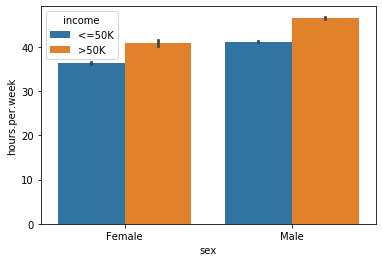

In [ ]:
sns.barplot(Income['sex'], Income['hours.per.week'], hue=Income['income'])

### 14. Work class + Hours per week

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

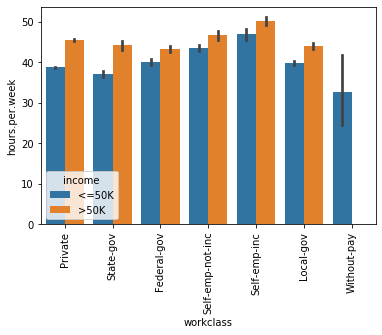

In [ ]:
sns.barplot(Income['workclass'], Income['hours.per.week'], hue=Income['income'])
plt.xticks(rotation=90)

#### Inference: 
<span style='color:Blue'> - People with income more than 50K is much more than people with income less than or equal to 50K <br> - People who work for more number of hours tend to have more income in all the cases </span> 

### 15. Pairwise relationships

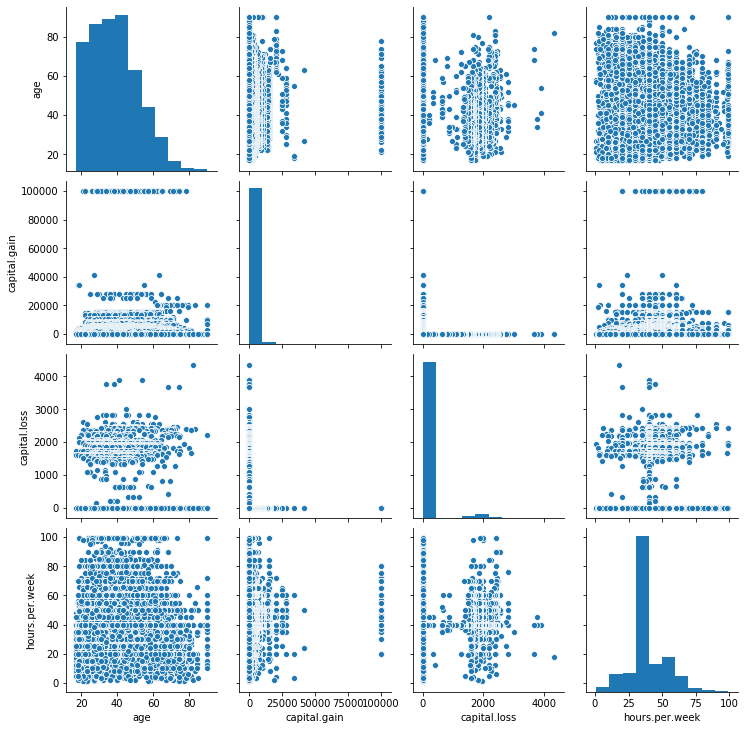

In [ ]:
sns.pairplot(Income[['age', 'capital.gain', 'capital.loss', 'hours.per.week']])

#### Inference: 
<span style='color:Blue'> - Capital gain and capital loss has lots of outliers </span> 

# Step - 4: Classifying Dependant variable

income is the dependant variable and there are two categories in it, namely, '>50K' and '<=50K'. If the income is '>50K' then it is classified as '1' and if income is '<=50K' it is classified as '0'

In [ ]:
Income['income'] = Income.apply(lambda row: 1 if '>50K'in row['income'] else 0, axis=1)

In [ ]:
Income.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,Dropout,4,Separated,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,College,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Separated,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,Dropout,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0


# Step - 5: Generating Dummy variables

In [ ]:
# To get the list of which are not of integer type

Income.select_dtypes(exclude=['int64', 'float64']).columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [ ]:
# Creating a dummy variable for the categorical variables and dropping the first one.

dummy1 = pd.get_dummies(Income[['workclass', 'education', 'marital.status','occupation','relationship', 'race','sex','native.country']], drop_first=True)

# Adding the results to the master dataframe

Income = pd.concat([Income, dummy1], axis=1)

In [ ]:
Income.shape

(30139, 93)

#### Dropping the repeated variables

In [ ]:
# We have created dummies for the below variables, so we can drop them

Income = Income.drop(['workclass', 'education', 'marital.status','occupation','relationship', 'race','sex','native.country'], 1)

In [ ]:
Income.shape

(30139, 85)

In [ ]:
Income.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,82,132870,9,0,4356,18,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,216864,9,0,3770,45,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,38,150601,6,0,3770,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
Income.columns

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_Bachelors',
       'education_College', 'education_Doctorate', 'education_Dropout',
       'education_HS-grad', 'education_Masters', 'marital.status_Not married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Not-in-family',
       'relationship_Other-relative', 'rela

# Step - 6: Checking for outliers

In statistics, an outlier is an observation point that is distant from other observations.

In [ ]:
# Checking for outliers in the continuous variables

Income_cont = Income[['age', 'fnlwgt', 'education.num','capital.gain','capital.loss','hours.per.week']]

In [ ]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%

Income_cont.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30139.000000,3.013900e+04,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,1.897950e+05,10.122532,1092.841202,88.439928,40.934703
std,13.131426,1.056586e+05,2.548738,7409.110596,404.445239,11.978753
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176275e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784170e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376045e+05,13.000000,0.000000,0.000000,45.000000
90%,57.000000,3.290092e+05,13.000000,0.000000,0.000000,55.000000
95%,62.000000,3.796916e+05,14.000000,5013.000000,0.000000,60.000000
99%,72.000000,5.112050e+05,16.000000,15024.000000,1980.000000,80.000000


#### Inference: 
<span style='color:Blue'> Its quite evident from the statistics that capital gain and capital loss has many outliers and this will create a problem in our further analysis </span> 

In [ ]:
# Checking IQR scores to detect outliers 

Q1 = Income_cont.quantile(0.25)
Q3 = Income_cont.quantile(0.75)
IQR = Q3 - Q1
print (IQR)

age                   19.0
fnlwgt            119977.0
education.num          4.0
capital.gain           0.0
capital.loss           0.0
hours.per.week         5.0
dtype: float64


In [ ]:
# Checking skewness to confirm outliers - skewness should be between -1 to +1

print(Income_cont.skew())

age                0.528971
fnlwgt             1.460055
education.num     -0.302845
capital.gain      11.898104
capital.loss       4.524409
hours.per.week     0.332386
dtype: float64


### Checking box plots for numerical variables

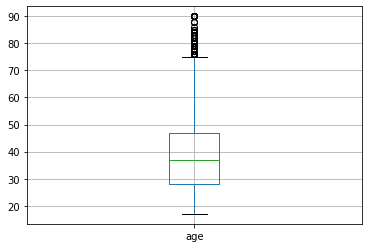

In [ ]:
Income_cont.boxplot('age')

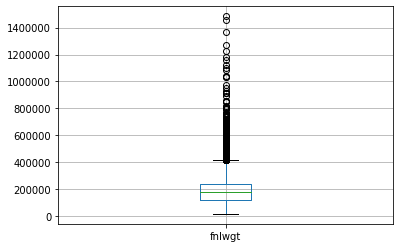

In [ ]:
Income_cont.boxplot('fnlwgt')

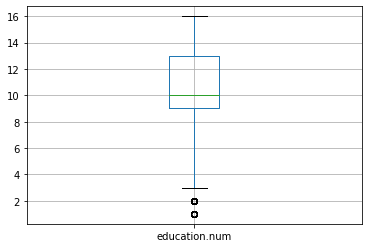

In [ ]:
Income_cont.boxplot('education.num')

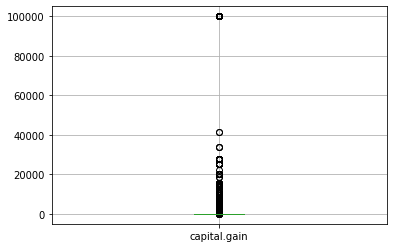

In [ ]:
Income_cont.boxplot('capital.gain')

In [ ]:
# Checking 95th percentile value

print(Income_cont['capital.gain'].quantile(0.95))

5013.0


In [ ]:
# Quantile based Capping 

Income_cont['capital.gain'] = np.where(Income_cont['capital.gain'] > 5013.0,5013.0, Income_cont['capital.gain'])
print(Income_cont['capital.gain'].skew())

3.2721946212063857


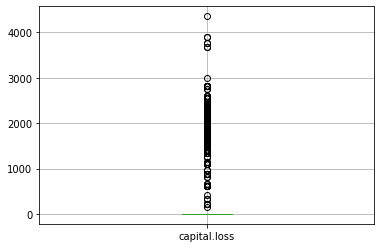

In [ ]:
Income_cont.boxplot('capital.loss')

In [ ]:
# Checking 99.7th percentile value

print(Income_cont['capital.loss'].quantile(0.997))

2415.0


In [ ]:
# Quantile based Capping 

Income_cont['capital.loss'] = np.where(Income_cont['capital.loss'] > 2415.0,2415.0, Income_cont['capital.loss'])
print(Income_cont['capital.loss'].skew())

4.444932082117378


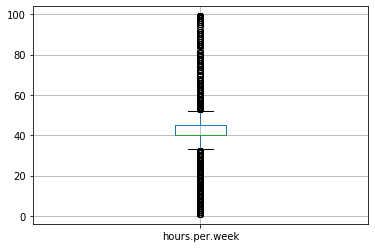

In [ ]:
Income_cont.boxplot('hours.per.week')

# Step - 7: Splitting the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

# Putting response variable to y

y = Income['income']

# Putting feature variables to X

X = Income.drop(['income'], axis=1)

In [ ]:
X.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,82,132870,9,0,4356,18,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,216864,9,0,3770,45,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,38,150601,6,0,3770,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
y.head()

1    0
3    0
4    0
5    0
6    0
Name: income, dtype: int64

In [ ]:
y.shape

(30139,)

In [ ]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(21097, 84)
(9042, 84)
(21097,)
(9042,)


# Step - 8: Scaling the features - Standard scalar technique

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

# Apply scaler() to all the columns except the 'dummy' variables

X_train[[ 'age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss','hours.per.week']] = scaler.fit_transform(X_train[[ 'age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss','hours.per.week']])

X_test[['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']] = scaler.transform(X_test[['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss','hours.per.week']])

X_train.head()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
15918,-1.259679,-0.063084,-0.047648,-0.147301,-0.219323,-1.748044,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
25202,-0.194964,-1.158192,1.122124,-0.147301,-0.219323,-0.077145,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
20804,-0.651270,1.677981,-0.047648,-0.147301,-0.219323,-0.077145,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1442,-0.271015,2.707250,-0.437572,-0.147301,3.247302,-0.077145,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
24259,-0.271015,-0.028064,1.512048,-0.147301,-0.219323,-0.077145,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_train.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
count,2.109700e+04,2.109700e+04,2.109700e+04,2.109700e+04,2.109700e+04,2.109700e+04,21097.000000,21097.000000,21097.000000,21097.000000,...,21097.000000,21097.000000,21097.000000,21097.000000,21097.000000,21097.000000,21097.000000,21097.000000,21097.000000,21097.000000
mean,-1.524748e-16,-1.112065e-16,3.987794e-16,5.392189e-16,9.082311e-16,-4.921231e-16,0.068351,0.737735,0.035266,0.084704,...,0.001232,0.003602,0.000332,0.002133,0.001564,0.000664,0.000616,0.912642,0.002417,0.000474
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,0.252353,0.439876,0.184455,0.278447,...,0.035085,0.059913,0.018213,0.046136,0.039520,0.025753,0.024816,0.282366,0.049109,0.021767
min,-1.639934e+00,-1.677288e+00,-3.556962e+00,-1.473008e-01,-2.193227e-01,-3.335397e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.033722e-01,-6.864773e-01,-4.375716e-01,-1.473008e-01,-2.193227e-01,-7.714549e-02,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,-1.189125e-01,-1.053606e-01,-4.764771e-02,-1.473008e-01,-2.193227e-01,-7.714549e-02,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.415983e-01,4.624131e-01,1.122124e+00,-1.473008e-01,-2.193227e-01,3.405791e-01,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.911795e+00,1.120251e+01,2.291895e+00,1.326366e+01,1.050555e+01,4.852004e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
### Checking the Converted Rate

Converted = (sum(Income['income'])/len(Income['income'].index))*100
Converted

24.904608646604068

# Step -9: Checking correlation

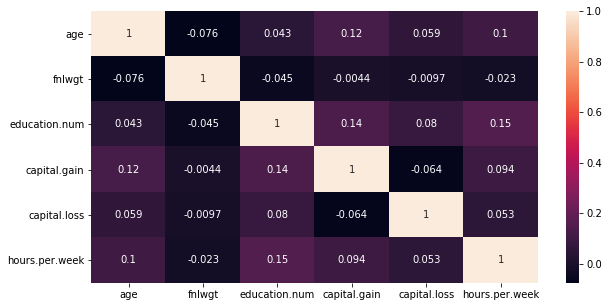

In [ ]:
# Let's see the correlation matrix 

plt.figure(figsize = (10,5))       
sns.heatmap(Income_cont.corr(),annot = True)
plt.show()

In [ ]:
# Let's see the correlation matrix

Income.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
age,1.000000,-0.076279,0.043203,0.080162,0.060141,0.101348,0.242017,0.068222,-0.210427,0.111055,...,0.001052,0.007823,0.000019,0.001910,-0.007895,-0.004950,0.007865,0.015774,-0.017800,0.000651
fnlwgt,-0.076279,1.000000,-0.045199,0.000420,-0.009755,-0.023033,-0.008992,-0.003524,0.046515,-0.025507,...,-0.014025,0.007123,-0.003056,-0.010602,0.001615,-0.001242,-0.000413,-0.083044,-0.010765,0.005708
education.num,0.043203,-0.045199,1.000000,0.124455,0.079613,0.152842,0.335413,0.097336,-0.164961,0.078821,...,-0.043112,-0.042149,0.001808,0.017804,0.049155,0.008179,-0.017161,0.126374,-0.010985,-0.001673
capital.gain,0.080162,0.000420,0.124455,1.000000,-0.032255,0.080429,0.221204,-0.009655,-0.048138,0.096462,...,-0.003830,-0.006276,-0.002818,-0.002588,0.007635,-0.003504,-0.003606,0.012320,-0.002498,-0.002319
capital.loss,0.060141,-0.009755,0.079613,-0.032255,1.000000,0.052380,0.150026,0.014682,-0.036302,0.030925,...,-0.007349,-0.004570,-0.004178,0.005669,0.005673,-0.005195,0.008845,0.015034,0.000337,-0.005040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native.country_Thailand,-0.004950,-0.001242,0.008179,-0.003504,-0.005195,0.012846,-0.003987,-0.006446,-0.008137,0.018048,...,-0.000798,-0.001431,-0.000454,-0.001154,-0.000887,1.000000,-0.000581,-0.076482,-0.001096,-0.000548
native.country_Trinadad&Tobago,0.007865,-0.000413,-0.017161,-0.003606,0.008845,-0.007576,-0.007797,-0.001260,0.002174,0.002627,...,-0.000822,-0.001473,-0.000467,-0.001188,-0.000913,-0.000581,1.000000,-0.078701,-0.001128,-0.000563
native.country_United-States,0.015774,-0.083044,0.126374,0.012320,0.015034,0.011018,0.039940,0.032847,-0.049570,0.007268,...,-0.108192,-0.193960,-0.061516,-0.156442,-0.120265,-0.076482,-0.078701,1.000000,-0.148513,-0.074197
native.country_Vietnam,-0.017800,-0.010765,-0.010985,-0.002498,0.000337,-0.010399,-0.018232,-0.003962,0.009389,-0.004979,...,-0.001550,-0.002779,-0.000881,-0.002242,-0.001723,-0.001096,-0.001128,-0.148513,1.000000,-0.001063


# Step - 10: Model Building

### 10.1 First training model

In [ ]:
import statsmodels.api as sm

# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 income   No. Observations:                21097
Model:                            GLM   Df Residuals:                    21012
Model Family:                Binomial   Df Model:                           84
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6839.0
Date:                Fri, 11 Sep 2020   Deviance:                       13678.
Time:                        17:19:16   Pearson chi2:                 4.89e+05
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.3398      0.841     -0.404      0.686      -1.988       1.309
age                                           0.3501      0.027     13.037      0.000       0.297       0.403
fnlwgt                                        0.0807      0.022      3.626      0.000       0.037       0.124
education.num                                 0.4651      0.138      3.383      0.001       0.196       0.735
capital.gain                                  2.3778      0.095     25.003      0.000       2.191       2.564
capital.loss                                  0.2659      0.019     14.332      0.000       0.230       0.302
hours.per.week                                0.3474      0.024     14.229      0.000       0.300       0.395
workclass_Local-gov                          -0.6889      0.136     -5.077      0.000      -0.955      -0.423
workclass_Private                            -0.5011      0.112     -4.467      0.000      -0.721      -0.281
workclass_Self-emp-inc                       -0.4058      0.148     -2.748      0.006      -0.695      -0.116
workclass_Self-emp-not-inc                   -0.9955      0.131     -7.590      0.000      -1.253      -0.738
workclass_State-gov                          -0.7818      0.150     -5.214      0.000      -1.076      -0.488
workclass_Without-pay                       -24.2351   5.46e+04     -0.000      1.000   -1.07e+05    1.07e+05
education_Bachelors                           0.2900      0.119      2.430      0.015       0.056       0.524
education_College                             0.0697      0.114      0.610      0.542      -0.154       0.293
education_Doctorate                           0.5997      0.314      1.912      0.056      -0.015       1.214
education_Dropout                            -0.4655      0.327     -1.421      0.155      -1.107       0.176
education_HS-grad                            -0.1044      0.154     -0.680      0.497      -0.405       0.197
education_Masters                             0.5616      0.183      3.066      0.002       0.203       0.921
marital.status_Not married                   -2.5216      0.314     -8.032      0.000      -3.137      -1.906
marital.status_Separated                     -2.1574      0.321     -6.730      0.000      -2.786      -1.529
marital.status_Widowed                       -1.8270      0.358     -5.104      0.000      -2.529      -1.125
occupation_Armed-Forces                      -0.7675      1.813     -0.423      0.672      -4.322       2.787
occupation_Craft-repair                       0.1348      0.097      1.392      0.164      -0.055       0.325
occupation_Exec-managerial                    0.8699      0.094      9.285      0.000       0.686       1.054
occ

### 10.2 Using Recursive Feature Elimination (RFE)

In [ ]:
#RFE

from sklearn.linear_model import LogisticRegression
# linear model

linear_model = SVC(kernel='linear')
linear_model.fit(x_train, y_train)

# predict
y_pred = linear_model.predict(x_test)

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

array([False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True,  True,  True, False, False, False,  True,  True, False,
        True,  True, False, False, False, False, False, False,  True,
        True, False,  True, False, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False])

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('age', False, 19),
 ('fnlwgt', False, 54),
 ('education.num', True, 1),
 ('capital.gain', True, 1),
 ('capital.loss', False, 31),
 ('hours.per.week', False, 20),
 ('workclass_Local-gov', False, 24),
 ('workclass_Private', False, 25),
 ('workclass_Self-emp-inc', False, 26),
 ('workclass_Self-emp-not-inc', False, 17),
 ('workclass_State-gov', False, 23),
 ('workclass_Without-pay', True, 1),
 ('education_Bachelors', False, 42),
 ('education_College', False, 55),
 ('education_Doctorate', False, 41),
 ('education_Dropout', False, 40),
 ('education_HS-grad', False, 43),
 ('education_Masters', False, 39),
 ('marital.status_Not married', True, 1),
 ('marital.status_Separated', True, 1),
 ('marital.status_Widowed', True, 1),
 ('occupation_Armed-Forces', False, 49),
 ('occupation_Craft-repair', False, 37),
 ('occupation_Exec-managerial', False, 2),
 ('occupation_Farming-fishing', True, 1),
 ('occupation_Handlers-cleaners', True, 1),
 ('occupation_Machine-op-inspct', False, 50),
 ('occupation_O

In [ ]:
col = X_train.columns[rfe.support_]

In [ ]:
X_train.columns[~rfe.support_]

Index(['age', 'fnlwgt', 'capital.loss', 'hours.per.week',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'education_Bachelors', 'education_College', 'education_Doctorate',
       'education_Dropout', 'education_HS-grad', 'education_Masters',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Machine-op-inspct',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Not-in-family',
       'relationship_Unmarried', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'native.country_Canada',
       'native.country_China', 'native.country_Cuba', 'native.country_Ecuador',
       'native.country_El-Salvador', 'native.country_England',
       'native.country_France', 'native.country_Germany',
       '

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
X_train_withoutconst = (X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 income   No. Observations:                21097
Model:                            GLM   Df Residuals:                    21076
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7334.6
Date:                Fri, 11 Sep 2020   Deviance:                       14669.
Time:                        17:20:21   Pearson chi2:                 3.41e+05
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.9423      0.093    -10.157      0.000      -1.124      -0.760
education.num                                 0.8936      0.024     36.581      0.000       0.846       0.941
capital.gain                                  2.3241      0.091     25.510      0.000       2.146       2.503
workclass_Without-pay                       -23.7333   5.26e+04     -0.000      1.000   -1.03e+05    1.03e+05
marital.status_Not married                   -2.2818      0.077    -29.691      0.000      -2.432      -2.131
marital.status_Separated                     -1.6715      0.080    -20.795      0.000      -1.829      -1.514
marital.status_Widowed                       -1.1364      0.172     -6.620      0.000      -1.473      -0.800
occupation_Farming-fishing                   -1.1812      0.141     -8.387      0.000      -1.457      -0.905
occupation_Handlers-cleaners                 -1.0664      0.151     -7.042      0.000      -1.363      -0.770
occupation_Other-service                     -1.2642      0.122    -10.390      0.000      -1.503      -1.026
occupation_Priv-house-serv                  -22.4153   1.89e+04     -0.001      0.999   -3.71e+04    3.71e+04
relationship_Other-relative                  -0.9037      0.235     -3.838      0.000      -1.365      -0.442
relationship_Own-child                       -1.4585      0.170     -8.575      0.000      -1.792      -1.125
relationship_Wife                             1.0684      0.118      9.056      0.000       0.837       1.300
sex_Male                                      0.9041      0.089     10.160      0.000       0.730       1.078
native.country_Columbia                      -2.5282      1.061     -2.382      0.017      -4.608      -0.448
native.country_Dominican-Republic           -14.4734    412.401     -0.035      0.972    -822.764     793.817
native.country_Nicaragua                     -2.0185      1.082     -1.865      0.062      -4.139       0.102
native.country_Outlying-US(Guam-USVI-etc)   -23.6298   6.44e+04     -0.000      1.000   -1.26e+05    1.26e+05
native.country_Peru                         -23.2797   4.39e+04     -0.001      1.000   -8.61e+04    8.61e+04
native.country_Vietnam                       -1.2505      0.665     -1.880      0.060      -2.554       0.053
=============================================================================================================
"""

In [ ]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:15]

15918    6.259018e-03
25202    6.506919e-01
20804    6.268238e-02
1442     4.507266e-02
24259    3.315835e-01
30780    9.214147e-10
13588    1.085935e-02
14419    3.161356e-01
13920    5.439328e-03
3727     4.282897e-01
2575     9.533940e-01
28204    3.161356e-01
8627     2.636492e-02
31702    3.398761e-02
5333     2.593308e-01
dtype: float64

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:15]

array([6.25901821e-03, 6.50691910e-01, 6.26823788e-02, 4.50726572e-02,
       3.31583485e-01, 9.21414729e-10, 1.08593471e-02, 3.16135569e-01,
       5.43932786e-03, 4.28289697e-01, 9.53394033e-01, 3.16135569e-01,
       2.63649164e-02, 3.39876113e-02, 2.59330823e-01])

In [ ]:
# Creating a dataframe with the actual income and the predicted income probabilities

y_train_pred_final = pd.DataFrame({'income':y_train.values, 'income_prob':y_train_pred})
y_train_pred_final['index'] = y_train.index
y_train_pred_final.head()

,income,income_prob,index
0,0,0.006259,15918
1,1,0.650692,25202
2,0,0.062682,20804
3,0,0.045073,1442
4,1,0.331583,24259


In [ ]:
# Creating new column 'Predicted' with 1 if income_prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.income_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,income,income_prob,index,Predicted
0,0,6.259018e-03,15918,0
1,1,6.506919e-01,25202,1
2,0,6.268238e-02,20804,0
3,0,4.507266e-02,1442,0
4,1,3.315835e-01,24259,0
5,0,9.214147e-10,30780,0
6,0,1.085935e-02,13588,0
7,0,3.161356e-01,14419,0
8,0,5.439328e-03,13920,0
9,0,4.282897e-01,3727,0


In [ ]:
from sklearn import metrics

In [ ]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.income, y_train_pred_final.Predicted))

0.8359956391904062


#### This accuracy seems to be good to go !!!

### 10.3 Checking Variance Inflation Factor (VIF) 

In [ ]:
# Importing VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train_withoutconst.columns
vif['VIF'] = [variance_inflation_factor(X_train_withoutconst.values, i) for i in range(X_train_withoutconst.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,marital.status_Not married,1.90
11,relationship_Own-child,1.61
13,sex_Male,1.33
8,occupation_Other-service,1.21
0,education.num,1.12
7,occupation_Handlers-cleaners,1.11
4,marital.status_Separated,1.10
10,relationship_Other-relative,1.09
6,occupation_Farming-fishing,1.07
9,occupation_Priv-house-serv,1.02


#### All the variables have VIF values less than 5. Hence acceptable. Next, we have to look into high p-values and drop the insignificant variables one by one.

High p- values, High VIF------Drop First

Low p value, Low VIF ---Keep

Low p-Value & High VIF------keep

High p-value & Low VIF----- Drop

### 10.4 Model - 1

In [ ]:
# Dropping variables with High p- values

X_train_sm.drop('workclass_Without-pay', axis = 1, inplace = True)

X_train_withoutconst.drop('workclass_Without-pay', axis = 1, inplace = True)


In [ ]:
col = col.drop('workclass_Without-pay', 1)
col

Index(['education.num', 'capital.gain', 'marital.status_Not married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Wife', 'sex_Male', 'native.country_Columbia',
       'native.country_Dominican-Republic', 'native.country_Nicaragua',
       'native.country_Outlying-US(Guam-USVI-etc)', 'native.country_Peru',
       'native.country_Vietnam'],
      dtype='object')

In [ ]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 income   No. Observations:                21097
Model:                            GLM   Df Residuals:                    21077
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7336.7
Date:                Fri, 11 Sep 2020   Deviance:                       14673.
Time:                        17:20:26   Pearson chi2:                 3.38e+05
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.9429      0.093    -10.163      0.000      -1.125      -0.761
education.num                                 0.8939      0.024     36.595      0.000       0.846       0.942
capital.gain                                  2.3235      0.091     25.513      0.000       2.145       2.502
marital.status_Not married                   -2.2814      0.077    -29.687      0.000      -2.432      -2.131
marital.status_Separated                     -1.6711      0.080    -20.790      0.000      -1.829      -1.514
marital.status_Widowed                       -1.1360      0.172     -6.617      0.000      -1.472      -0.800
occupation_Farming-fishing                   -1.1873      0.141     -8.435      0.000      -1.463      -0.911
occupation_Handlers-cleaners                 -1.0660      0.151     -7.040      0.000      -1.363      -0.769
occupation_Other-service                     -1.2647      0.122    -10.396      0.000      -1.503      -1.026
occupation_Priv-house-serv                  -22.4140   1.89e+04     -0.001      0.999   -3.71e+04    3.71e+04
relationship_Other-relative                  -0.9034      0.235     -3.837      0.000      -1.365      -0.442
relationship_Own-child                       -1.4603      0.170     -8.587      0.000      -1.794      -1.127
relationship_Wife                             1.0652      0.118      9.032      0.000       0.834       1.296
sex_Male                                      0.9041      0.089     10.161      0.000       0.730       1.079
native.country_Columbia                      -2.5281      1.061     -2.382      0.017      -4.608      -0.448
native.country_Dominican-Republic           -14.4691    411.571     -0.035      0.972    -821.134     792.196
native.country_Nicaragua                     -2.0176      1.082     -1.864      0.062      -4.139       0.103
native.country_Outlying-US(Guam-USVI-etc)   -23.6285   6.44e+04     -0.000      1.000   -1.26e+05    1.26e+05
native.country_Peru                         -23.2793   4.39e+04     -0.001      1.000   -8.61e+04    8.61e+04
native.country_Vietnam                       -1.2496      0.665     -1.879      0.060      -2.553       0.054
=============================================================================================================
"""

In [ ]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [ ]:
y_train_pred[:10]

array([6.24696726e-03, 6.50683510e-01, 6.26784056e-02, 4.50638677e-02,
       3.31701727e-01, 9.23143589e-10, 1.08377016e-02, 3.16009460e-01,
       5.42695172e-03, 4.26660850e-01])

In [ ]:
y_train_pred_final['income_prob'] = y_train_pred

In [ ]:
# Creating new column 'predicted' with 1 if income_prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.income_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,income,income_prob,index,Predicted
0,0,0.006247,15918,0
1,1,0.650684,25202,1
2,0,0.062678,20804,0
3,0,0.045064,1442,0
4,1,0.331702,24259,0


In [ ]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.income, y_train_pred_final.Predicted))

0.8359956391904062


#### The overall accuracy remains the same!!

#### Checking VIF

In [ ]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train_withoutconst.columns
vif['VIF'] = [variance_inflation_factor(X_train_withoutconst.values, i) for i in range(X_train_withoutconst.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,marital.status_Not married,1.90
10,relationship_Own-child,1.61
12,sex_Male,1.33
7,occupation_Other-service,1.21
0,education.num,1.12
6,occupation_Handlers-cleaners,1.11
3,marital.status_Separated,1.10
9,relationship_Other-relative,1.09
5,occupation_Farming-fishing,1.07
8,occupation_Priv-house-serv,1.02


### 10.5 Model - 2

In [ ]:
# Dropping variables with High p- values

X_train_sm.drop('native.country_Outlying-US(Guam-USVI-etc)', axis = 1, inplace = True)

X_train_withoutconst.drop('native.country_Outlying-US(Guam-USVI-etc)', axis = 1, inplace = True)

In [ ]:
col = col.drop('native.country_Outlying-US(Guam-USVI-etc)', 1)
col

Index(['education.num', 'capital.gain', 'marital.status_Not married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Wife', 'sex_Male', 'native.country_Columbia',
       'native.country_Dominican-Republic', 'native.country_Nicaragua',
       'native.country_Peru', 'native.country_Vietnam'],
      dtype='object')

In [ ]:
# Refit the model with the new set of features

logm2 = sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 income   No. Observations:                21097
Model:                            GLM   Df Residuals:                    21078
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7338.1
Date:                Fri, 11 Sep 2020   Deviance:                       14676.
Time:                        17:20:31   Pearson chi2:                 3.39e+05
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.9429      0.093    -10.164      0.000      -1.125      -0.761
education.num                         0.8941      0.024     36.603      0.000       0.846       0.942
capital.gain                          2.3241      0.091     25.518      0.000       2.146       2.503
marital.status_Not married           -2.2824      0.077    -29.698      0.000      -2.433      -2.132
marital.status_Separated             -1.6722      0.080    -20.808      0.000      -1.830      -1.515
marital.status_Widowed               -1.1360      0.172     -6.617      0.000      -1.473      -0.800
occupation_Farming-fishing           -1.1870      0.141     -8.432      0.000      -1.463      -0.911
occupation_Handlers-cleaners         -1.0655      0.151     -7.036      0.000      -1.362      -0.769
occupation_Other-service             -1.2646      0.122    -10.396      0.000      -1.503      -1.026
occupation_Priv-house-serv          -22.4131   1.89e+04     -0.001      0.999   -3.71e+04    3.71e+04
relationship_Other-relative          -0.9029      0.235     -3.834      0.000      -1.364      -0.441
relationship_Own-child               -1.4594      0.170     -8.582      0.000      -1.793      -1.126
relationship_Wife                     1.0632      0.118      9.019      0.000       0.832       1.294
sex_Male                              0.9039      0.089     10.159      0.000       0.729       1.078
native.country_Columbia              -2.5278      1.061     -2.382      0.017      -4.608      -0.448
native.country_Dominican-Republic   -14.4729    412.451     -0.035      0.972    -822.862     793.917
native.country_Nicaragua             -2.0171      1.082     -1.864      0.062      -4.138       0.104
native.country_Peru                 -23.2787   4.39e+04     -0.001      1.000   -8.61e+04    8.61e+04
native.country_Vietnam               -1.2493      0.665     -1.878      0.060      -2.553       0.055
=====================================================================================================
"""

In [ ]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [ ]:
y_train_pred[:10]

array([6.24558055e-03, 6.50666112e-01, 6.26029619e-02, 4.50051534e-02,
       3.31459748e-01, 9.19616325e-10, 1.08317950e-02, 3.15923433e-01,
       5.42311078e-03, 4.26760605e-01])

In [ ]:
y_train_pred_final['income_prob'] = y_train_pred

In [ ]:
# Creating new column 'predicted' with 1 if income_prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.income_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,income,income_prob,index,Predicted
0,0,0.006246,15918,0
1,1,0.650666,25202,1
2,0,0.062603,20804,0
3,0,0.045005,1442,0
4,1,0.331460,24259,0


In [ ]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.income, y_train_pred_final.Predicted))

0.8359956391904062


#### The accuracy still remains to be the same!!

#### Checking VIF

In [ ]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train_withoutconst.columns
vif['VIF'] = [variance_inflation_factor(X_train_withoutconst.values, i) for i in range(X_train_withoutconst.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,marital.status_Not married,1.90
10,relationship_Own-child,1.61
12,sex_Male,1.33
7,occupation_Other-service,1.21
0,education.num,1.12
6,occupation_Handlers-cleaners,1.11
3,marital.status_Separated,1.10
9,relationship_Other-relative,1.09
5,occupation_Farming-fishing,1.07
8,occupation_Priv-house-serv,1.02


### 10.6 Model - 3

In [ ]:
# Dropping variables with High p- values

X_train_sm.drop('native.country_Peru', axis = 1, inplace = True)

X_train_withoutconst.drop('native.country_Peru', axis = 1, inplace = True)

In [ ]:
col = col.drop('native.country_Peru', 1)
col

Index(['education.num', 'capital.gain', 'marital.status_Not married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Wife', 'sex_Male', 'native.country_Columbia',
       'native.country_Dominican-Republic', 'native.country_Nicaragua',
       'native.country_Vietnam'],
      dtype='object')

In [ ]:
# Refit the model with the new set of features

logm2 = sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 income   No. Observations:                21097
Model:                            GLM   Df Residuals:                    21079
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7340.1
Date:                Fri, 11 Sep 2020   Deviance:                       14680.
Time:                        17:20:35   Pearson chi2:                 3.41e+05
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.9438      0.093    -10.175      0.000      -1.126      -0.762
education.num                         0.8945      0.024     36.618      0.000       0.847       0.942
capital.gain                          2.3250      0.091     25.525      0.000       2.146       2.504
marital.status_Not married           -2.2825      0.077    -29.698      0.000      -2.433      -2.132
marital.status_Separated             -1.6723      0.080    -20.812      0.000      -1.830      -1.515
marital.status_Widowed               -1.1352      0.172     -6.612      0.000      -1.472      -0.799
occupation_Farming-fishing           -1.1862      0.141     -8.426      0.000      -1.462      -0.910
occupation_Handlers-cleaners         -1.0681      0.151     -7.057      0.000      -1.365      -0.771
occupation_Other-service             -1.2642      0.122    -10.392      0.000      -1.503      -1.026
occupation_Priv-house-serv          -21.4124   1.15e+04     -0.002      0.999   -2.25e+04    2.25e+04
relationship_Other-relative          -0.9023      0.235     -3.832      0.000      -1.364      -0.441
relationship_Own-child               -1.4595      0.170     -8.583      0.000      -1.793      -1.126
relationship_Wife                     1.0642      0.118      9.027      0.000       0.833       1.295
sex_Male                              0.9040      0.089     10.161      0.000       0.730       1.078
native.country_Columbia              -2.5272      1.061     -2.381      0.017      -4.608      -0.447
native.country_Dominican-Republic   -14.4776    413.597     -0.035      0.972    -825.113     796.157
native.country_Nicaragua             -2.0164      1.082     -1.863      0.062      -4.137       0.105
native.country_Vietnam               -1.2486      0.665     -1.877      0.061      -2.552       0.055
=====================================================================================================
"""

In [ ]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [ ]:
y_train_pred[:10]

array([6.23756256e-03, 6.50554022e-01, 6.25412755e-02, 4.49539511e-02,
       3.31365014e-01, 9.14448979e-10, 1.08182042e-02, 3.15695616e-01,
       5.41475769e-03, 4.26858974e-01])

In [ ]:
y_train_pred_final['income_prob'] = y_train_pred

In [ ]:
# Creating new column 'predicted' with 1 if income_prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.income_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,income,income_prob,index,Predicted
0,0,0.006238,15918,0
1,1,0.650554,25202,1
2,0,0.062541,20804,0
3,0,0.044954,1442,0
4,1,0.331365,24259,0


In [ ]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.income, y_train_pred_final.Predicted))

0.8359956391904062


In [ ]:
TrainSet_Predicted= y_train_pred_final

In [ ]:
TrainSet_Predicted.head()

,income,income_prob,index,Predicted
0,0,0.006238,15918,0
1,1,0.650554,25202,1
2,0,0.062541,20804,0
3,0,0.044954,1442,0
4,1,0.331365,24259,0


In [ ]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.income, y_train_pred_final.Predicted))

0.8359956391904062


#### The accuracy still remains to be the same!!

#### Checking VIF

In [ ]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train_withoutconst.columns
vif['VIF'] = [variance_inflation_factor(X_train_withoutconst.values, i) for i in range(X_train_withoutconst.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,marital.status_Not married,1.90
10,relationship_Own-child,1.61
12,sex_Male,1.33
7,occupation_Other-service,1.21
0,education.num,1.12
6,occupation_Handlers-cleaners,1.11
3,marital.status_Separated,1.10
9,relationship_Other-relative,1.09
5,occupation_Farming-fishing,1.07
8,occupation_Priv-house-serv,1.02


### 10.7 Model - 4

In [ ]:
# Dropping variables with High p- values

X_train_sm.drop('occupation_Priv-house-serv', axis = 1, inplace = True)

X_train_withoutconst.drop('occupation_Priv-house-serv', axis = 1, inplace = True)

In [ ]:
col = col.drop('occupation_Priv-house-serv', 1)
col

Index(['education.num', 'capital.gain', 'marital.status_Not married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Other-service', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Wife', 'sex_Male',
       'native.country_Columbia', 'native.country_Dominican-Republic',
       'native.country_Nicaragua', 'native.country_Vietnam'],
      dtype='object')

In [ ]:
# Refit the model with the new set of features

logm2 = sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 income   No. Observations:                21097
Model:                            GLM   Df Residuals:                    21080
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7344.9
Date:                Fri, 11 Sep 2020   Deviance:                       14690.
Time:                        17:20:39   Pearson chi2:                 3.45e+05
No. Iterations:                    17                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.9556      0.093    -10.319      0.000      -1.137      -0.774
education.num                         0.8960      0.024     36.698      0.000       0.848       0.944
capital.gain                          2.3270      0.091     25.546      0.000       2.148       2.506
marital.status_Not married           -2.2812      0.077    -29.708      0.000      -2.432      -2.131
marital.status_Separated             -1.6702      0.080    -20.800      0.000      -1.828      -1.513
marital.status_Widowed               -1.1360      0.172     -6.623      0.000      -1.472      -0.800
occupation_Farming-fishing           -1.1849      0.141     -8.416      0.000      -1.461      -0.909
occupation_Handlers-cleaners         -1.0663      0.151     -7.044      0.000      -1.363      -0.770
occupation_Other-service             -1.2602      0.122    -10.358      0.000      -1.499      -1.022
relationship_Other-relative          -0.9475      0.235     -4.033      0.000      -1.408      -0.487
relationship_Own-child               -1.4588      0.170     -8.578      0.000      -1.792      -1.126
relationship_Wife                     1.0690      0.118      9.083      0.000       0.838       1.300
sex_Male                              0.9152      0.089     10.302      0.000       0.741       1.089
native.country_Columbia              -2.5272      1.062     -2.381      0.017      -4.608      -0.447
native.country_Dominican-Republic   -14.4847    415.106     -0.035      0.972    -828.077     799.108
native.country_Nicaragua             -2.0147      1.082     -1.861      0.063      -4.136       0.107
native.country_Vietnam               -1.2468      0.666     -1.874      0.061      -2.551       0.058
=====================================================================================================
"""

In [ ]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [ ]:
y_train_pred_final['income_prob'] = y_train_pred

In [ ]:
# Creating new column 'predicted' with 1 if income_prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.income_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,income,income_prob,index,Predicted
0,0,0.006174,15918,0
1,1,0.650734,25202,1
2,0,0.062558,20804,0
3,0,0.044940,1442,0
4,1,0.332133,24259,0


In [ ]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.income, y_train_pred_final.Predicted))

0.8359956391904062


#### The accuracy still remains to be the same!!

#### Checking VIF

In [ ]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train_withoutconst.columns
vif['VIF'] = [variance_inflation_factor(X_train_withoutconst.values, i) for i in range(X_train_withoutconst.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,marital.status_Not married,1.89
9,relationship_Own-child,1.61
11,sex_Male,1.33
7,occupation_Other-service,1.21
0,education.num,1.11
6,occupation_Handlers-cleaners,1.11
3,marital.status_Separated,1.09
8,relationship_Other-relative,1.09
5,occupation_Farming-fishing,1.07
1,capital.gain,1.02


### 10.8 Model - 5

In [ ]:
# Dropping variables with High p- values

X_train_sm.drop('native.country_Dominican-Republic', axis = 1, inplace = True)

X_train_withoutconst.drop('native.country_Dominican-Republic', axis = 1, inplace = True)

In [ ]:
col = col.drop('native.country_Dominican-Republic', 1)
col

Index(['education.num', 'capital.gain', 'marital.status_Not married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Other-service', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Wife', 'sex_Male',
       'native.country_Columbia', 'native.country_Nicaragua',
       'native.country_Vietnam'],
      dtype='object')

In [ ]:
# Refit the model with the new set of features

logm2 = sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 income   No. Observations:                21097
Model:                            GLM   Df Residuals:                    21081
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7349.2
Date:                Fri, 11 Sep 2020   Deviance:                       14698.
Time:                        17:20:43   Pearson chi2:                 3.49e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.9559      0.093    -10.322      0.000      -1.137      -0.774
education.num                    0.8964      0.024     36.739      0.000       0.849       0.944
capital.gain                     2.3288      0.091     25.560      0.000       2.150       2.507
marital.status_Not married      -2.2828      0.077    -29.736      0.000      -2.433      -2.132
marital.status_Separated        -1.6719      0.080    -20.820      0.000      -1.829      -1.514
marital.status_Widowed          -1.1357      0.172     -6.621      0.000      -1.472      -0.800
occupation_Farming-fishing      -1.1834      0.141     -8.405      0.000      -1.459      -0.907
occupation_Handlers-cleaners    -1.0652      0.151     -7.036      0.000      -1.362      -0.768
occupation_Other-service        -1.2607      0.122    -10.364      0.000      -1.499      -1.022
relationship_Other-relative     -0.9468      0.235     -4.030      0.000      -1.407      -0.486
relationship_Own-child          -1.4569      0.170     -8.567      0.000      -1.790      -1.124
relationship_Wife                1.0689      0.118      9.082      0.000       0.838       1.300
sex_Male                         0.9141      0.089     10.289      0.000       0.740       1.088
native.country_Columbia         -2.5258      1.062     -2.379      0.017      -4.606      -0.445
native.country_Nicaragua        -2.0135      1.082     -1.860      0.063      -4.135       0.108
native.country_Vietnam          -1.2455      0.666     -1.871      0.061      -2.550       0.059
================================================================================================
"""

In [ ]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [ ]:
y_train_pred_final['income_prob'] = y_train_pred

In [ ]:
# Creating new column 'predicted' with 1 if income_prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.income_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,income,income_prob,index,Predicted
0,0,0.006173,15918,0
1,1,0.650472,25202,1
2,0,0.062367,20804,0
3,0,0.044794,1442,0
4,1,0.331539,24259,0


In [ ]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.income, y_train_pred_final.Predicted))

0.8358534388775656


#### The overall accuracy hasn't dropped much!!

#### Checking VIF

In [ ]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train_withoutconst.columns
vif['VIF'] = [variance_inflation_factor(X_train_withoutconst.values, i) for i in range(X_train_withoutconst.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,marital.status_Not married,1.89
9,relationship_Own-child,1.61
11,sex_Male,1.33
7,occupation_Other-service,1.21
0,education.num,1.11
6,occupation_Handlers-cleaners,1.11
3,marital.status_Separated,1.09
8,relationship_Other-relative,1.09
5,occupation_Farming-fishing,1.07
1,capital.gain,1.02


### 10.9 Model - 6

In [ ]:
# Dropping variables with High p- values

X_train_sm.drop('native.country_Nicaragua', axis = 1, inplace = True)

X_train_withoutconst.drop('native.country_Nicaragua', axis = 1, inplace = True)

In [ ]:
col = col.drop('native.country_Nicaragua', 1)
col

Index(['education.num', 'capital.gain', 'marital.status_Not married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Other-service', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Wife', 'sex_Male',
       'native.country_Columbia', 'native.country_Vietnam'],
      dtype='object')

In [ ]:
# Refit the model with the new set of features

logm2 = sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 income   No. Observations:                21097
Model:                            GLM   Df Residuals:                    21082
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7352.0
Date:                Fri, 11 Sep 2020   Deviance:                       14704.
Time:                        17:20:45   Pearson chi2:                 3.51e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.9564      0.093    -10.328      0.000      -1.138      -0.775
education.num                    0.8961      0.024     36.738      0.000       0.848       0.944
capital.gain                     2.3300      0.091     25.571      0.000       2.151       2.509
marital.status_Not married      -2.2828      0.077    -29.737      0.000      -2.433      -2.132
marital.status_Separated        -1.6710      0.080    -20.810      0.000      -1.828      -1.514
marital.status_Widowed          -1.1365      0.172     -6.626      0.000      -1.473      -0.800
occupation_Farming-fishing      -1.1823      0.141     -8.397      0.000      -1.458      -0.906
occupation_Handlers-cleaners    -1.0710      0.151     -7.077      0.000      -1.368      -0.774
occupation_Other-service        -1.2609      0.122    -10.368      0.000      -1.499      -1.023
relationship_Other-relative     -0.9508      0.235     -4.050      0.000      -1.411      -0.491
relationship_Own-child          -1.4562      0.170     -8.562      0.000      -1.790      -1.123
relationship_Wife                1.0660      0.118      9.061      0.000       0.835       1.297
sex_Male                         0.9137      0.089     10.284      0.000       0.740       1.088
native.country_Columbia         -2.5244      1.062     -2.378      0.017      -4.605      -0.444
native.country_Vietnam          -1.2443      0.666     -1.870      0.062      -2.549       0.060
================================================================================================
"""

In [ ]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [ ]:
y_train_pred_final['income_prob'] = y_train_pred

In [ ]:
# Creating new column 'predicted' with 1 if income_prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.income_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,income,income_prob,index,Predicted
0,0,0.006173,15918,0
1,1,0.650119,25202,1
2,0,0.062302,20804,0
3,0,0.044752,1442,0
4,1,0.331360,24259,0


In [ ]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.income, y_train_pred_final.Predicted))

0.8358060387732853


#### The overall accuracy hasn't dropped much!!

#### Checking VIF

In [ ]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train_withoutconst.columns
vif['VIF'] = [variance_inflation_factor(X_train_withoutconst.values, i) for i in range(X_train_withoutconst.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,marital.status_Not married,1.89
9,relationship_Own-child,1.61
11,sex_Male,1.33
7,occupation_Other-service,1.21
0,education.num,1.11
6,occupation_Handlers-cleaners,1.11
3,marital.status_Separated,1.09
8,relationship_Other-relative,1.09
5,occupation_Farming-fishing,1.07
1,capital.gain,1.02


### 10.10 Model - 7

In [ ]:
# Dropping variables with High p- values

X_train_sm.drop('native.country_Vietnam', axis = 1, inplace = True)

X_train_withoutconst.drop('native.country_Vietnam', axis = 1, inplace = True)

In [ ]:
col = col.drop('native.country_Vietnam', 1)
col

Index(['education.num', 'capital.gain', 'marital.status_Not married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Other-service', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Wife', 'sex_Male',
       'native.country_Columbia'],
      dtype='object')

In [ ]:
# Refit the model with the new set of features

logm2 = sm.GLM(y_train,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 income   No. Observations:                21097
Model:                            GLM   Df Residuals:                    21083
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7354.2
Date:                Fri, 11 Sep 2020   Deviance:                       14708.
Time:                        17:20:48   Pearson chi2:                 3.46e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.9573      0.093    -10.338      0.000      -1.139      -0.776
education.num                    0.8965      0.024     36.767      0.000       0.849       0.944
capital.gain                     2.3272      0.091     25.608      0.000       2.149       2.505
marital.status_Not married      -2.2846      0.077    -29.766      0.000      -2.435      -2.134
marital.status_Separated        -1.6700      0.080    -20.798      0.000      -1.827      -1.513
marital.status_Widowed          -1.1354      0.172     -6.620      0.000      -1.472      -0.799
occupation_Farming-fishing      -1.1825      0.141     -8.401      0.000      -1.458      -0.907
occupation_Handlers-cleaners    -1.0701      0.151     -7.072      0.000      -1.367      -0.774
occupation_Other-service        -1.2626      0.122    -10.382      0.000      -1.501      -1.024
relationship_Other-relative     -0.9561      0.234     -4.078      0.000      -1.416      -0.497
relationship_Own-child          -1.4615      0.170     -8.588      0.000      -1.795      -1.128
relationship_Wife                1.0653      0.118      9.057      0.000       0.835       1.296
sex_Male                         0.9126      0.089     10.273      0.000       0.738       1.087
native.country_Columbia         -2.5230      1.062     -2.377      0.017      -4.604      -0.442
================================================================================================
"""

In [ ]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [ ]:
y_train_pred_final['income_prob'] = y_train_pred

In [ ]:
# Creating new column 'predicted' with 1 if income_prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.income_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,income,income_prob,index,Predicted
0,0,0.006127,15918,0
1,1,0.649890,25202,1
2,0,0.062107,20804,0
3,0,0.044601,1442,0
4,1,0.331395,24259,0


In [ ]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.income, y_train_pred_final.Predicted))

0.8357112385647248


#### The overall accuracy hasn't dropped much!!

#### Checking VIF

In [ ]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train_withoutconst.columns
vif['VIF'] = [variance_inflation_factor(X_train_withoutconst.values, i) for i in range(X_train_withoutconst.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,marital.status_Not married,1.89
9,relationship_Own-child,1.61
11,sex_Male,1.33
7,occupation_Other-service,1.21
6,occupation_Handlers-cleaners,1.11
0,education.num,1.10
3,marital.status_Separated,1.09
8,relationship_Other-relative,1.08
5,occupation_Farming-fishing,1.07
1,capital.gain,1.02


#### All the features look significant now with low p-values(< 0.05) and with no correlation between them as they have low VIFs (VIF <5). So Model - 7 is the final selected model

# Step - 11: Getting the predicted values on the train set

In [ ]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)

y_train_pred[:10]

15918    0.006127
25202    0.649890
20804    0.062107
1442     0.044601
24259    0.331395
30780    0.001741
13588    0.010710
14419    0.314368
13920    0.005352
3727     0.426855
dtype: float64

In [ ]:
X_train_sm.shape

(21097, 14)

In [ ]:
y_train_pred.shape

(21097,)

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00612732, 0.64989045, 0.06210693, 0.04460144, 0.33139477,
       0.00174116, 0.01070968, 0.3143676 , 0.00535153, 0.42685464])

In [ ]:
# Creating a dataframe with the actual income and the predicted income probabilities

y_train_pred_final = pd.DataFrame({'income':y_train.values, 'income_prob':y_train_pred})
y_train_pred_final['index'] = y_train.index
y_train_pred_final.head()

,income,income_prob,index
0,0,0.006127,15918
1,1,0.649890,25202
2,0,0.062107,20804
3,0,0.044601,1442
4,1,0.331395,24259


In [ ]:
# Creating new column 'predicted' with 1 if income_prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.income_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,income,income_prob,index,Predicted
0,0,0.006127,15918,0
1,1,0.649890,25202,1
2,0,0.062107,20804,0
3,0,0.044601,1442,0
4,1,0.331395,24259,0


In [ ]:
y_train_pred_final['income%']= round(y_train_pred_final['income_prob']*100, 2)

In [ ]:
y_train_pred_final.head(10)

,income,income_prob,index,Predicted,income%
0,0,0.006127,15918,0,0.61
1,1,0.649890,25202,1,64.99
2,0,0.062107,20804,0,6.21
3,0,0.044601,1442,0,4.46
4,1,0.331395,24259,0,33.14
5,0,0.001741,30780,0,0.17
6,0,0.010710,13588,0,1.07
7,0,0.314368,14419,0,31.44
8,0,0.005352,13920,0,0.54
9,0,0.426855,3727,0,42.69


In [ ]:
TrainSet_y_Predicted= y_train_pred_final

#### Confusion matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

The basic terms are: <br>
<span style='color:Blue'> 
TP - A true positive is an outcome where the model correctly predicts the positive class.<br>
TN - A true negative is an outcome where the model correctly predicts the negative class. <br>
FP - A false positive is an outcome where the model incorrectly predicts the positive class. <br>
FN - A false negative is an outcome where the model incorrectly predicts the negative class. </span>

In [ ]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.income, y_train_pred_final.Predicted )
print(confusion)

[[14806  1051]
 [ 2415  2825]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.income, y_train_pred_final.Predicted))

0.8357112385647248


### Metrics beyond simply accuracy

Checking accuracy alone can be misleading. Sometimes it may be desirable to select a model with a lower accuracy because it has a greater predictive power on the problem. There is no best way to evaluate any system, but different metrics give us different and valuable insights into how a classification model performs based upon the problem.So checking out Precision, Recall, specificity etc

In [ ]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.5391221374045801

In [ ]:
# Let us calculate specificity

TN / float(TN+FP)

0.9337201236047171

In [ ]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.06627987639528284


In [ ]:
# positive predictive value

print (TP / float(TP+FP))

0.7288441692466461


In [ ]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8597642413332559


In [ ]:
# Calculate false negative rate 

print(FN/ float(TP+FN))

0.46087786259541985


### Inference from Model - 7 train data: 
<span style='color:Blue'> - Accuracy = 83.57% <br> - Sensitivity/ Recall/ TPR = 53.91% <br> - Specificity/ TNR = 93.37% <br> - Precision/ Positive predictive value = 72.88% </span> 

# Step -12: Model Evaluation


## Plotting ROC curve

ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds. ROC curves are appropriate when the observations are balanced between each class

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.income, y_train_pred_final.income_prob, drop_intermediate = False )

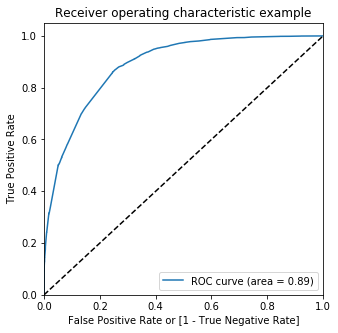

In [ ]:
draw_roc(y_train_pred_final.income, y_train_pred_final.income_prob)

## Finding optimal cutoff point wrt accuracy, sensitivity and specificity 

In [ ]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.income_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(2)

,income,income_prob,index,Predicted,income%,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.006127,15918,0,0.61,1,0,0,0,0,0,0,0,0,0
1,1,0.649890,25202,1,64.99,1,1,1,1,1,1,1,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.income, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.248377  1.000000  0.000000
0.1   0.1  0.688250  0.950000  0.601753
0.2   0.2  0.768119  0.880916  0.730844
0.3   0.3  0.781012  0.854962  0.756574
0.4   0.4  0.832915  0.584924  0.914864
0.5   0.5  0.835711  0.539122  0.933720
0.6   0.6  0.837181  0.507252  0.946207
0.7   0.7  0.816372  0.311641  0.983162
0.8   0.8  0.795753  0.193511  0.994766
0.9   0.9  0.781817  0.125191  0.998802


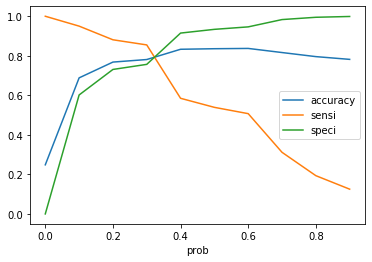

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.income_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,income,income_prob,index,Predicted,income%,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.006127,15918,0,0.61,1,0,0,0,0,0,0,0,0,0,0
1,1,0.649890,25202,1,64.99,1,1,1,1,1,1,1,0,0,0,1
2,0,0.062107,20804,0,6.21,1,0,0,0,0,0,0,0,0,0,0
3,0,0.044601,1442,0,4.46,1,0,0,0,0,0,0,0,0,0,0
4,1,0.331395,24259,0,33.14,1,1,1,1,0,0,0,0,0,0,0


In [ ]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.income, y_train_pred_final.final_predicted)

0.82438261364175

In [ ]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.income, y_train_pred_final.final_predicted )
confusion1

array([[13714,  2143],
       [ 1562,  3678]], dtype=int64)

In [ ]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model/ Recall

TP / float(TP+FN)

0.7019083969465649

In [ ]:
# Let us calculate specificity

TN / float(TN+FP)

0.864854638330075

In [ ]:
# Calculate false positive rate

print(FP/ float(TN+FP))

0.13514536166992494


In [ ]:
# Positive predictive value/ Precision 

print (TP / float(TP+FP))

0.6318501975605566


In [ ]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8977481015972768


In [ ]:
# Calculate false negative rate 

print(FN/ float(TP+FN))

0.29809160305343513


### Precision and Recall

##### Precision
TP / TP + FP

##### Recall
TP / TP + FN

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_pred_final.income, y_train_pred_final.final_predicted)


0.6318501975605566

In [ ]:
recall_score(y_train_pred_final.income, y_train_pred_final.final_predicted)

0.7019083969465649

### Inference from train data with cutoff point = 0.35: 
<span style='color:Blue'> - Accuracy = 82.44% <br> - Sensitivity/ Recall/ TPR = 70.19% <br> - Specificity/ TNR = 86.48% <br> - Precision/ Positive predictive value = 63.18%  </span> 

## Finding optimal cutoff point wrt precision and recall 

Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds. Precision-recall curves are appropriate for imbalanced datasets

### Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.income, y_train_pred_final.Predicted

(0        0
 1        1
 2        0
 3        0
 4        1
         ..
 21092    0
 21093    0
 21094    0
 21095    0
 21096    0
 Name: income, Length: 21097, dtype: int64,
 0        0
 1        1
 2        0
 3        0
 4        0
         ..
 21092    0
 21093    0
 21094    1
 21095    0
 21096    0
 Name: Predicted, Length: 21097, dtype: int64)

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.income, y_train_pred_final.income_prob)

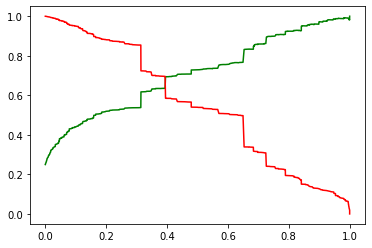

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### The optimal value of threshold(cutoff) could be chosen as 0.4 value in order to have correct predictions.

### Computing accuracy, sensitivity and specificity based on optimal cutoff value 0.4

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.income_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,income,income_prob,index,Predicted,income%,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.006127,15918,0,0.61,1,0,0,0,0,0,0,0,0,0,0
1,1,0.649890,25202,1,64.99,1,1,1,1,1,1,1,0,0,0,1
2,0,0.062107,20804,0,6.21,1,0,0,0,0,0,0,0,0,0,0
3,0,0.044601,1442,0,4.46,1,0,0,0,0,0,0,0,0,0,0
4,1,0.331395,24259,0,33.14,1,1,1,1,0,0,0,0,0,0,0


In [ ]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.income, y_train_pred_final.final_predicted)

0.8329146324121913

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.income, y_train_pred_final.final_predicted )
confusion2

array([[14507,  1350],
       [ 2175,  3065]], dtype=int64)

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model/ Recall

TP / float(TP+FN)

0.5849236641221374

In [ ]:
# Let us calculate specificity

TN / float(TN+FP)

0.9148640978747556

In [ ]:
# Calculate false positive rate

print(FP/ float(TN+FP))

0.08513590212524437


In [ ]:
# Positive predictive value/ Precision 

print (TP / float(TP+FP))

0.6942242355605889


In [ ]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8696199496463254


In [ ]:
# Calculate false negative rate 

print(FN/ float(TP+FN))

0.4150763358778626


### Inference from train data with cutoff point = 0.4: 
<span style='color:Blue'> - Accuracy = 83.29% <br> - Sensitivity/ Recall/ TPR = 58.49% <br> - Specificity/ TNR = 91.48% <br> - Precision/ Positive predictive value = 69.42% </span> 

# Step - 13: Making predictions on test set

In [ ]:
X_test = X_test[col]
X_test.head()

,education.num,capital.gain,marital.status_Not married,marital.status_Separated,marital.status_Widowed,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Other-service,relationship_Other-relative,relationship_Own-child,relationship_Wife,sex_Male,native.country_Columbia
1520,-0.437572,13.263656,0,0,0,0,0,0,0,0,0,1,0
28432,-0.047648,-0.147301,0,1,0,0,0,1,0,0,0,0,0
11077,-2.387191,-0.147301,0,0,0,0,1,0,0,0,0,1,0
30770,-0.437572,-0.147301,1,0,0,0,1,0,1,0,0,1,0
7152,-0.437572,-0.147301,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
X_test.shape

(9042, 13)

In [ ]:
y_test.shape

(9042,)

In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
X_test_sm.shape

(9042, 14)

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

1520     1.000000
28432    0.013715
11077    0.026655
30770    0.006117
7152     0.033491
31716    0.041987
19804    0.348166
13923    0.077400
17419    0.394080
15590    0.188459
dtype: float64

In [ ]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

,0
1520,1.000000
28432,0.013715
11077,0.026655
30770,0.006117
7152,0.033491


In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting index
y_test_df['Index'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

,income,Index,0
0,1,1520,1.000000
1,0,28432,0.013715
2,0,11077,0.026655
3,0,30770,0.006117
4,0,7152,0.033491


In [ ]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'income_prob'})

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Index','income','income_prob'], axis=1)

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Index,income,income_prob
0,1520,1,1.000000
1,28432,0,0.013715
2,11077,0,0.026655
3,30770,0,0.006117
4,7152,0,0.033491


In [ ]:
y_pred_final['final_predicted'] = y_pred_final.income_prob.map(lambda x: 1 if x > 0.4 else 0)

In [ ]:
y_pred_final.head()

,Index,income,income_prob,final_predicted
0,1520,1,1.000000,1
1,28432,0,0.013715,0
2,11077,0,0.026655,0
3,30770,0,0.006117,0
4,7152,0,0.033491,0


In [ ]:
y_pred_final['income%']= round(y_pred_final['income_prob']*100, 2)
y_pred_final.head()

,Index,income,income_prob,final_predicted,income%
0,1520,1,1.000000,1,100.00
1,28432,0,0.013715,0,1.37
2,11077,0,0.026655,0,2.67
3,30770,0,0.006117,0,0.61
4,7152,0,0.033491,0,3.35


In [ ]:
y_pred_final.shape

(9042, 5)

In [ ]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.income, y_pred_final.final_predicted)

0.8344392833443929

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.income, y_pred_final.final_predicted )
confusion2

array([[6207,  569],
       [ 928, 1338]], dtype=int64)

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity/ Recall  of our logistic regression model

TP / float(TP+FN)

0.5904677846425419

In [ ]:
# Let's see the precision/ positive predictive value  of our logistic regression model

TP / float(TP+FP)

0.7016255899318301

In [ ]:
# Let us calculate specificity

TN / float(TN+FP)

0.9160271546635183

In [ ]:
# Negative predictive value

print (TN / float(TN+ FN))

0.869936930623686


In [ ]:
# Calculate false negative rate 

print(FN/ float(TP+FN))

0.4095322153574581


In [ ]:
# Calculate false positive rate

print(FP/ float(TN+FP))

0.0839728453364817


### Inference from test data with cutoff point = 0.4: 
<span style='color:Blue'> - Accuracy = 83.44% <br> - Sensitivity/ Recall/ TPR = 59.05% <br> - Specificity/ TNR = 91.6% <br> - Precision/ Positive predictive value = 70.16% </span> 

# Regularization techniques

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os


## Ridge Regression

In [ ]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                            4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_sm, y_train_pred)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    5.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.121446,0.194890,0.003200,0.003920,0.0001,{'alpha': 0.0001},-0.088582,-0.086958,-0.088295,-0.088999,...,-0.088662,0.001136,1,-0.088322,-0.089087,-0.088667,-0.088331,-0.088244,-0.088530,0.000314
1,0.027069,0.003732,0.001600,0.003199,0.001,{'alpha': 0.001},-0.088582,-0.086958,-0.088295,-0.088999,...,-0.088662,0.001136,2,-0.088322,-0.089087,-0.088667,-0.088331,-0.088244,-0.088530,0.000314
2,0.018339,0.003471,0.007851,0.006988,0.01,{'alpha': 0.01},-0.088582,-0.086958,-0.088295,-0.088999,...,-0.088662,0.001136,3,-0.088322,-0.089087,-0.088667,-0.088331,-0.088244,-0.088530,0.000314
3,0.021878,0.007656,0.000000,0.000000,0.05,{'alpha': 0.05},-0.088582,-0.086958,-0.088296,-0.088999,...,-0.088662,0.001136,4,-0.088322,-0.089088,-0.088668,-0.088331,-0.088244,-0.088530,0.000314
4,0.018912,0.007970,0.009377,0.007656,0.1,{'alpha': 0.1},-0.088582,-0.086958,-0.088296,-0.089000,...,-0.088663,0.001136,5,-0.088323,-0.089088,-0.088668,-0.088331,-0.088244,-0.088531,0.000314


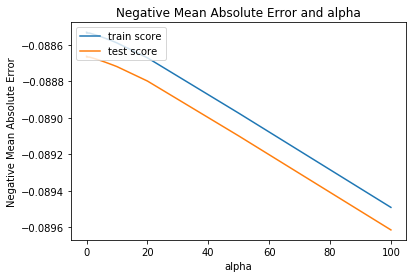

In [ ]:
# plotting mean test and train scores with alpha 

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:

ridge = Ridge(alpha=model_cv.best_params_['alpha']).fit(X_train_sm, y_train_pred)

ridge.coef_

array([ 0.        ,  0.11493526,  0.06543807, -0.31493213, -0.27765078,
       -0.21319009, -0.12790238, -0.08098462, -0.05890726, -0.01861008,
       -0.03421117,  0.10256503,  0.07160787, -0.12744356])

In [ ]:
ridge_train_score = ridge.score(X_train_sm, y_train_pred)
ridge_train_score

0.7982966877539219

In [ ]:
#  Let's make prediction using final model

y_test_predict_ridge  = ridge.predict(X_test_sm)

from sklearn.metrics import r2_score
r2_score(y_test_pred, y_test_predict_ridge)

0.8036702011145154

### Inference from Ridge regression: 
<span style='color:Blue'> - Training score = 79.83% <br> - Testing score = 80.37%  </span> 

## Lasso Regression

In [ ]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_sm, y_train_pred) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    5.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.068809,0.062098,0.004801,0.003920,0.0001,{'alpha': 0.0001},-0.088444,-0.086840,-0.088250,-0.088919,...,-0.088554,0.001121,2,-0.088223,-0.088983,-0.088555,-0.088219,-0.088131,-0.088422,0.000315
1,0.025604,0.003201,0.003201,0.003921,0.001,{'alpha': 0.001},-0.088087,-0.086519,-0.087972,-0.088642,...,-0.088205,0.001064,1,-0.087922,-0.088596,-0.088248,-0.087882,-0.087775,-0.088084,0.000300
2,0.025603,0.003200,0.003200,0.003919,0.01,{'alpha': 0.01},-0.102189,-0.100371,-0.102202,-0.103504,...,-0.102125,0.001004,3,-0.102244,-0.102166,-0.102150,-0.101933,-0.101733,-0.102045,0.000187
3,0.022402,0.003202,0.004802,0.003921,0.05,{'alpha': 0.05},-0.181828,-0.180811,-0.181944,-0.183171,...,-0.182301,0.001043,4,-0.182633,-0.182431,-0.181854,-0.181992,-0.182307,-0.182243,0.000285
4,0.023689,0.000624,0.003201,0.003920,0.1,{'alpha': 0.1},-0.211424,-0.210577,-0.212566,-0.215501,...,-0.213147,0.002088,5,-0.213273,-0.213273,-0.213375,-0.212790,-0.212803,-0.213103,0.000253


In [ ]:
lasso = Lasso(alpha=model_cv.best_params_['alpha']).fit(X_train_sm, y_train_pred)

        
lasso.fit(X_train_sm, y_train_pred)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.coef_

array([ 0.        ,  0.11725784,  0.0650308 , -0.31335486, -0.26946099,
       -0.17627135, -0.09096935, -0.05476374, -0.04837022, -0.        ,
       -0.02811472,  0.08362234,  0.06833489, -0.        ])

In [ ]:
# Let's create a new data frame with lasso coeff values, corresponding column names and absolute coefficient values
lasso_df = pd.DataFrame() 
lasso_df['Coeff'] = pd.Series(lasso.coef_) 
lasso_df['Vars'] = X_train_sm.columns

# Removing rows that have coeff = 0
lasso_df = lasso_df.loc[lasso_df['Coeff']!=0]

lasso_df['Absolute Coeff Value'] =lasso_df['Coeff'].apply(lambda x:abs(x))
lasso_df.sort_values(by=['Absolute Coeff Value'],inplace=True,ascending=False)

print(lasso_df.head(20))

       Coeff                          Vars  Absolute Coeff Value
3  -0.313355    marital.status_Not married              0.313355
4  -0.269461      marital.status_Separated              0.269461
5  -0.176271        marital.status_Widowed              0.176271
1   0.117258                 education.num              0.117258
6  -0.090969    occupation_Farming-fishing              0.090969
11  0.083622             relationship_Wife              0.083622
12  0.068335                      sex_Male              0.068335
2   0.065031                  capital.gain              0.065031
7  -0.054764  occupation_Handlers-cleaners              0.054764
8  -0.048370      occupation_Other-service              0.048370
10 -0.028115        relationship_Own-child              0.028115


In [ ]:
lasso_train_score = lasso.score(X_train_sm, y_train_pred)
lasso_train_score

0.7957843882038602

In [ ]:
#  Let's make prediction using final model

y_test_predict_lasso  = lasso.predict(X_test_sm)

from sklearn.metrics import r2_score
r2_score(y_test_pred, y_test_predict_lasso)

0.8007683015353095

### Inference from Lasso regression: 
<span style='color:Blue'> - Training score = 79.57% <br> - Testing score = 80.08%  </span> 

# Step - 14: Inferences and Conclusions

**Model - 7 is the final fitted model and the features that can affect income are:**


1. marital.status_Not married
2. marital.status_Separated	
3. marital.status_Widowed
4. relationship_Own-child	
5. relationship_Other-relative
6. relationship_Wife
7. sex_Male
8. education.num
9. occupation_Other-service	
10. occupation_Handlers-cleaners		
11. occupation_Farming-fishing	
12. capital.gain		
13. native.country_Columbia	


**Notes:**

- When Threshold is HIGH, Precision is HIGH & When threshold is LOW, Sensitivity/Recall is HIGH
- Optimal cutoff probability is that probability where we get balanced sensitivity and specificity & Precision. 
- In this case an optimal cutoff of 0.4 was chosen after checking ROC curve plot, precision & recall tradeoff and accuracy, sensitivity and specificity plot


**Highlights from train data with cutoff = 0.4:** 

<span style='color: Red'> - Accuracy = 83.29% <br> - Sensitivity/ Recall/ TPR = 58.49% <br> - Specificity/ TNR = 91.48% <br> - Precision/ Positive predictive value = 69.42%  </span> 

**Highlights from test data with cutoff = 0.4:** 

<span style='color: Red'> - Accuracy = 83.44% <br> - Sensitivity/ Recall/ TPR = 59.05% <br> - Specificity/ TNR = 91.6% <br> - Precision/ Positive predictive value = 70.16% </span> 

- Ridge and Lasso regression regularization technique can be used for improvement in model performance

**Inference from Ridge regression:**

<span style='color:Blue'> - Training score = 79.83% <br> - Testing score = 80.37%  </span> 

**Inference from Lasso regression:** 

<span style='color:Blue'> - Training score = 79.57% <br> - Testing score = 80.08%  </span> 

In this case study, Ridge and Lasso regression techniques gave almost similar results but the variation from usual logistic regression can be noted from the above inferences.
